<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/week5/Matplotlib2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file walks through <u>each individual graph</u> that can be plotted by pandas's `.plot()`. For comparison purpose, the alternative codes of matplotlib's pyplot are also provided (if available).

In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Pandas 2.1.4
NumPy 1.26.4
IPython 7.34.0
Matplotlib 3.7.1


# Preparation

Prepare the random data generator to help us easily create dummy data (numpy.ndarray) for plotting

In [ ]:
# Set the random seed
rng = np.random.RandomState(0)

In [ ]:
# Try running this cell repeatedly to see how samples are randomly generated
print( f"Random from a uniform distribution over [0,1):\n>> {rng.rand(5)}" )
print( f"Random from a normal distribution:\n>> {rng.randn(5)}" )

Random from a uniform distribution over [0,1):
>> [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
Random from a normal distribution:
>> [-0.84272405  1.96992445  1.26611853 -0.50587654  2.54520078]


Load datasets

In [ ]:
# Pokemon Dataset

# Load
df_pokemon = pd.read_csv('https://raw.githubusercontent.com/ShaileshDhama/Exploratory-Data-Analysis-On-Pokemon-Dataset/master/Complete%20Pokemon.csv')

# Preview
df_pokemon.info()
display(df_pokemon.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

In [ ]:
# NBA-Player Dataset from https://www.kaggle.com/datasets/justinas/nba-players-data

# Load
df_nba = pd.read_csv('nba-players.csv')

# Preview
df_nba.info()
display(df_nba.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            10516 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0  ...  5.7  16.1  3.1        16.1     0.186     0.323    0.100   0.479   
1  ...  2.3   1.5  0.3        12.3     0.078     0.151    0.175   0.430   
2  ...  0.8   1.0  0.4        -2.1     0.105     0.102    0.103   0.376   
3  ...  3.7   2.3  0.6        -8.7     0.060     0.149    0.167   0.399   
4  ...  2.4   2.4  0.2       -11.2     0.109     0.179    0.127   0.611   

   ast_pct   season  
0    0.113  1996-97  
1    0.048  1996-97  
2    0.148  1996-97  
3    0.077  1996-97  
4    0.040  1996-97  

[5 rows x 22 columns]

In [ ]:
# Air-Quality Dataset from https://github.com/pandas-dev/pandas/blob/main/doc/data/air_quality_no2.csv

# Load
df_air = pd.read_csv('air_quality_no2.csv')

# Convert dtype of the first column from object to datetime
df_air['datetime'] = pd.to_datetime( df_air['datetime'] )

# Preview
df_air.info()
display(df_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         1035 non-null   datetime64[ns]
 1   station_antwerp  95 non-null     float64       
 2   station_paris    1004 non-null   float64       
 3   station_london   969 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 32.5 KB


datetime  station_antwerp  station_paris  station_london
0 2019-05-07 02:00:00              NaN            NaN            23.0
1 2019-05-07 03:00:00             50.5           25.0            19.0
2 2019-05-07 04:00:00             45.0           27.7            19.0
3 2019-05-07 05:00:00              NaN           50.4            16.0
4 2019-05-07 06:00:00              NaN           61.9             NaN

# What is pandas's plotting method?

- Pandas's `.plot()` is a wrapper over matplotlib's pyplot.
- Pandas's `.plot(..., kind)` is an attribute of <u>both pandas.DataFrame and pandas.Series, providing a small subset of plots available with Matplotlib</u> as follow.
  - `kind='line'` : line plot (default)
  - `kind='bar'` : vertical bar plot
  - `kind='barh'` : horizontal bar plot
  - `kind='hist'` : histogram
  - `kind='box'` : boxplot
  - `kind='kde'` : Kernel Density Estimation plot
  - `kind='density'` : same as ‘kde’
  - `kind='area'` : area plot
  - `kind='pie'` : pie plot
  - `kind='scatter'` : scatter plot (DataFrame only)
  - `kind='hexbin'` : hexbin plot (DataFrame only)

- **The main APIs:**
  - For pandas.Series: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html
  - For pandas.DataFrame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Three alternative callings for plotting a pandas.Series:
- Two alternative callings with pandas's `.plot()`
- One alternative calling with (direct) matplotlib

<Axes: >

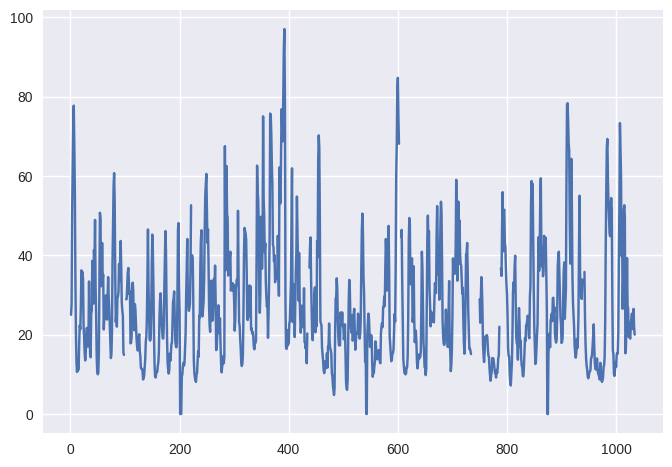

In [ ]:
# Plotting a pandas.Series with pandas's .plot()

# Alternative 1
# default: kind='line', x=None (use row labels), y=None (use all numeric columns)
df_air['station_paris'].plot()

# Alternative 2
#df_air['station_paris'].plot.line()

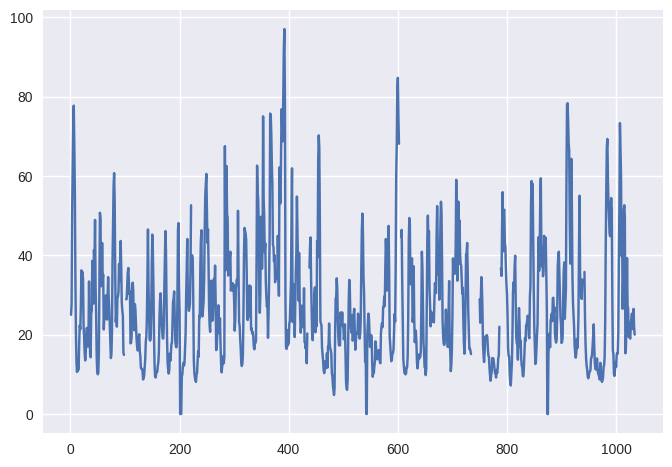

In [ ]:
# Plotting a pandas.Series with matplotlib.pyplot

# Plot y=df_air['station_paris] using x as index array 0..N-1
plt.plot( df_air['station_paris'] )

Three alternative callings for plotting a pandas.DataFrame:
- Two alternative callings with pandas's `.plot()`
- One alternative calling with (direct) matplotlib

<Axes: >

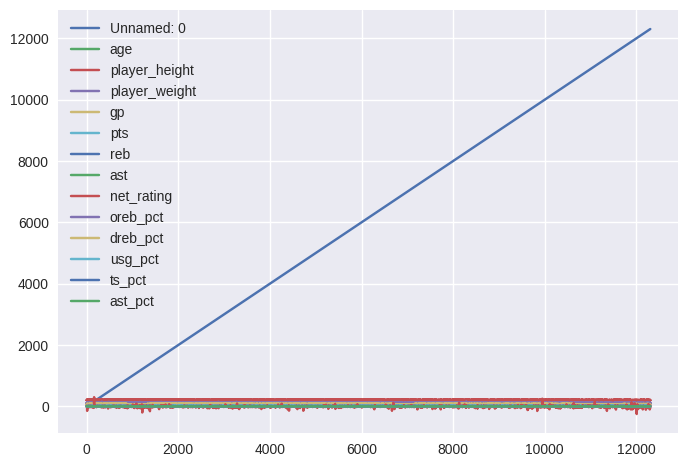

In [ ]:
# Plotting all columns in a pandas.DataFrame with pandas's .plot()
# Non-numerical columns are skipped by default

# Alternative 1
# default: kind='line', x=None (use df.index), y=None (use all numeric columns)
df_nba.plot()

# Alternative 2
#df_nba.plot.line()

ConversionError: Failed to convert value(s) to axis units: array(['Dennis Rodman', 'Dwayne Schintzius', 'Earl Cureton', ...,
       'Marcus Smart', 'Marcus Garrett', 'Micah Potter'], dtype=object)

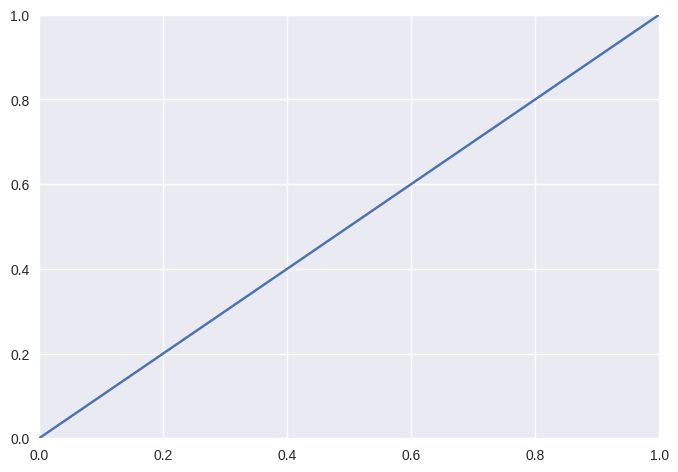

In [ ]:
# Plotting all columns in a pandas.DataFrame with matplotlib's pyplot
# Error as this dataframe contains one or more columns that cannot be plotted by a line plot

# Plot y using x as index array 0..N-1
plt.plot(df_nba)  # ValueError

<Axes: xlabel='datetime'>

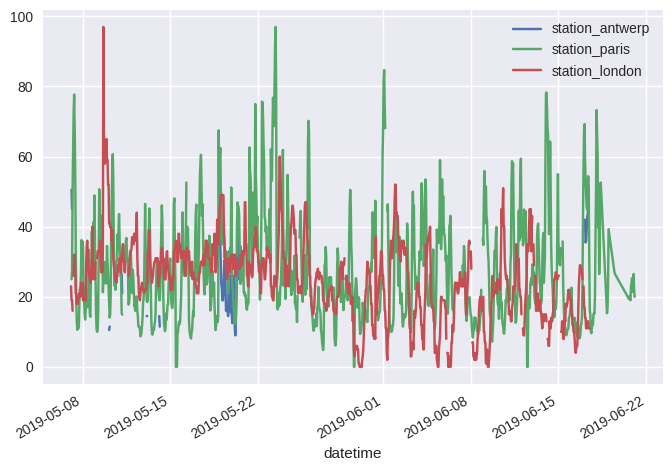

In [ ]:
# Plotting all columns in a pandas.DataFrame with pandas's .plot()
# Specify the X values to plot explicitly

# Alternative 1
# default: kind='line', x=None (use df.index), y=None (use all numeric columns)
df_air.plot(x='datetime')       # Use the specified column as x-axis

# Alternative 2
#df_air.plot.line(x='datetime')

In [ ]:
# Plotting a pandas.DataFrame with matplotlib's pyplot
# No error when all columns of the dataframe are numeric

# Plot y using x as index array 0..N-1
plt.plot( df_air.iloc[ : , 1: ] )  # OK

In [ ]:
# Plotting a pandas.DataFrame with matplotlib's pyplot
# Explicitly specify the values of X and Y to plot

# Plot y using df_air['datetime'] as x
plt.plot( df_air['datetime'], df_air.iloc[ : , 1: ] )  # OK

**pandas's .plot() vs. matplotlib's pyplot:**
- Although they look very similar, interchangeable uses are not always guaranteed.
- Consider only pandas' if you want to organize and rearrange your data to create proof-of-concept visualizations without using other libraries explicitly
- Consider matplotlib on top of pandas if you want to have full control over your visualization

# [FYI] Pandas's interactive plot with Plotly backend

In [ ]:
# Check the current plotting backend
print(f'Pandas {pd.__version__} [Plotting backend = {pd.options.plotting.backend}]')

Pandas 2.1.4 [Plotting backend = matplotlib]


In [ ]:
import plotly
print(f'Plotly {plotly.__version__}')

Plotly 5.15.0


The default plotting backend in Pandas is matplotlib. To use another backend:
- Set it globally by `pd.options.plotting.backend = 'plotly'` or `pd.set_option('plotting.backend', 'plotly')`
- Set it locally in each command; for example, `df.plot(..., backend='plotly')`

<Axes: xlabel='datetime'>

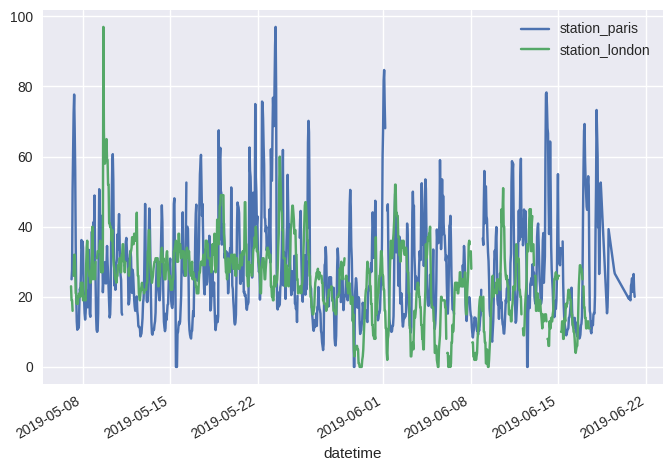

In [ ]:
# Plot with the default plotting backend (matplotlib)
df_air.plot( x='datetime', y=['station_paris', 'station_london'] )

In [ ]:
# Plot with plotly
df_air.plot( x='datetime', y=['station_paris', 'station_london'], backend='plotly' )

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# 1. Line plot

## 1.1 Matplotlib's pyplot (MATLAB-style interface)

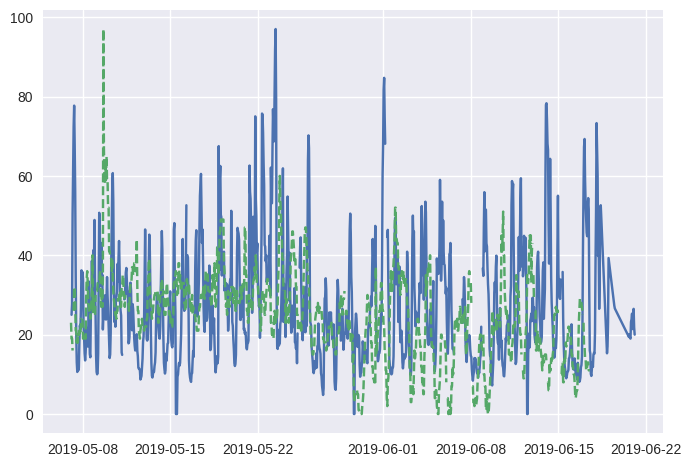

In [ ]:
# Plot two graphs in the same axes
# More available line/marker styles in https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

# Line1: plot with the given x and y
plt.plot( df_air['datetime'], df_air['station_paris'], linestyle='solid' )  # Use keyword arguments
#plt.plot( df_air['datetime'], df_air['station_paris'], '-' )     # Use string formatting

# Line2: plot with the given x and y
plt.plot( df_air['datetime'], df_air['station_london'], linestyle='dashed' )  # Use keyword arguments
#plt.plot( df_air['datetime'], df_air['station_london'], '--' )   # Use string formatting

A good explanation about what are differences between `figsize` vs. `dpi`: https://stackoverflow.com/a/47639545

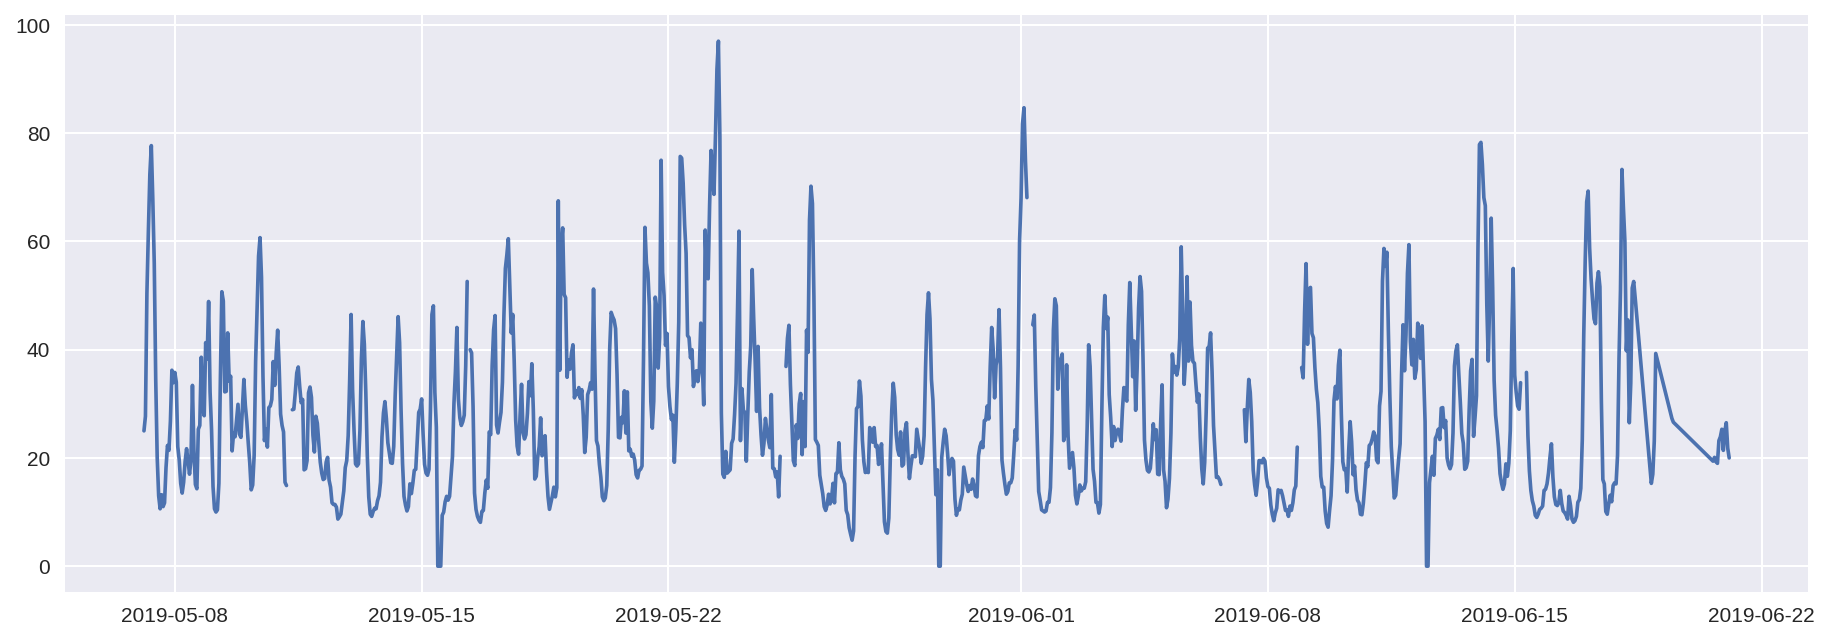

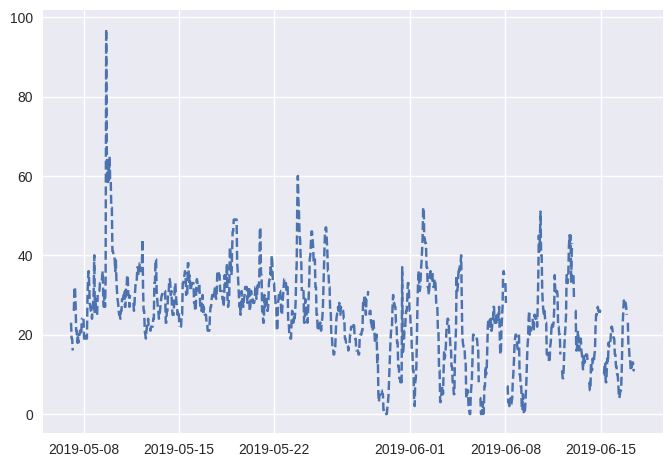

In [ ]:
# Repeat plotting the above cell with additional settings for figure's size and dpi

# (Optional) Figure setting
# FYI: Many scientific journals require images in 300, 600, or 1200 dpi
plt.figure(figsize=(15,5),dpi=150)  # default: figsize=(6.4,4.8), dpi=100

# Plot with the given x and y
# To separate the graph of each line to two separated figures, just add plt.show() command after each figure
plt.plot( df_air['datetime'], df_air['station_paris'], linestyle='solid' )    # Use keyword arguments
plt.show()    # Add this command to flush the first figure to the output
plt.plot( df_air['datetime'], df_air['station_london'], linestyle='dashed' )  # Use keyword arguments
#plt.show()    # For jupyter, this command is optional as any figure left unshown will be automatically flushed to the output at the end of the cell

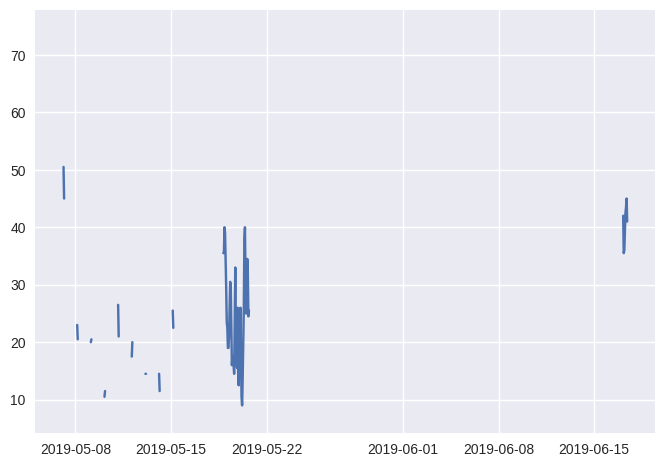

In [ ]:
# Note that matplotlib only draws a line between consecutive (valid) data points and leaves a gap at NA values

# An example of matplotlib's line plot with NA values
plt.plot( df_air['datetime'], df_air['station_antwerp'], linestyle='solid' )

## 1.2 Matplotlib's pyplot (OO-style interface)

- Most `matplotlib.pyplot` functions translate directly to axes-based methods. For example, suppose that `ax_myvar` is a variable holding a matplotlib's axis, changing from MATLAB style to OO style can be as easy as follows:
  - `plt.plot()` => `ax_myvar.plot()`
  - `plt.legend()` => `ax_myvar.legend()`
  - etc.

- But for some `matplotlib.pyplot` functions, transitioning between MATLAB-style functions and OO-style methods needs changes:
  - `plt.xlabel()` => `ax_myvar.set_xlabel()`
  - `plt.ylabel()` => `ax_myvar.set_ylabel()`
  - `plt.xlim()` => `ax_myvar.set_xlim()`
  - `plt.ylim()` => `ax_myvar.set_ylim()`
  - `plt.title()` => `ax_myvar.set_title()`

In [ ]:
# Plot two graphs in the same axes + Set figure's size and dpi

# (Optional) Figure setting
fig = plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = fig.gca()    # Get the axes of the specified figure
#ax = plt.gca()   # Get the currently active axes

# Plot with the given x and y
ax.plot( df_air['datetime'], df_air['station_paris'], linestyle='solid' )    # Use keyword arguments
ax.plot( df_air['datetime'], df_air['station_london'], linestyle='dashed' )  # Use keyword arguments

## 1.3 Pandas's .plot()

<Axes: xlabel='datetime'>

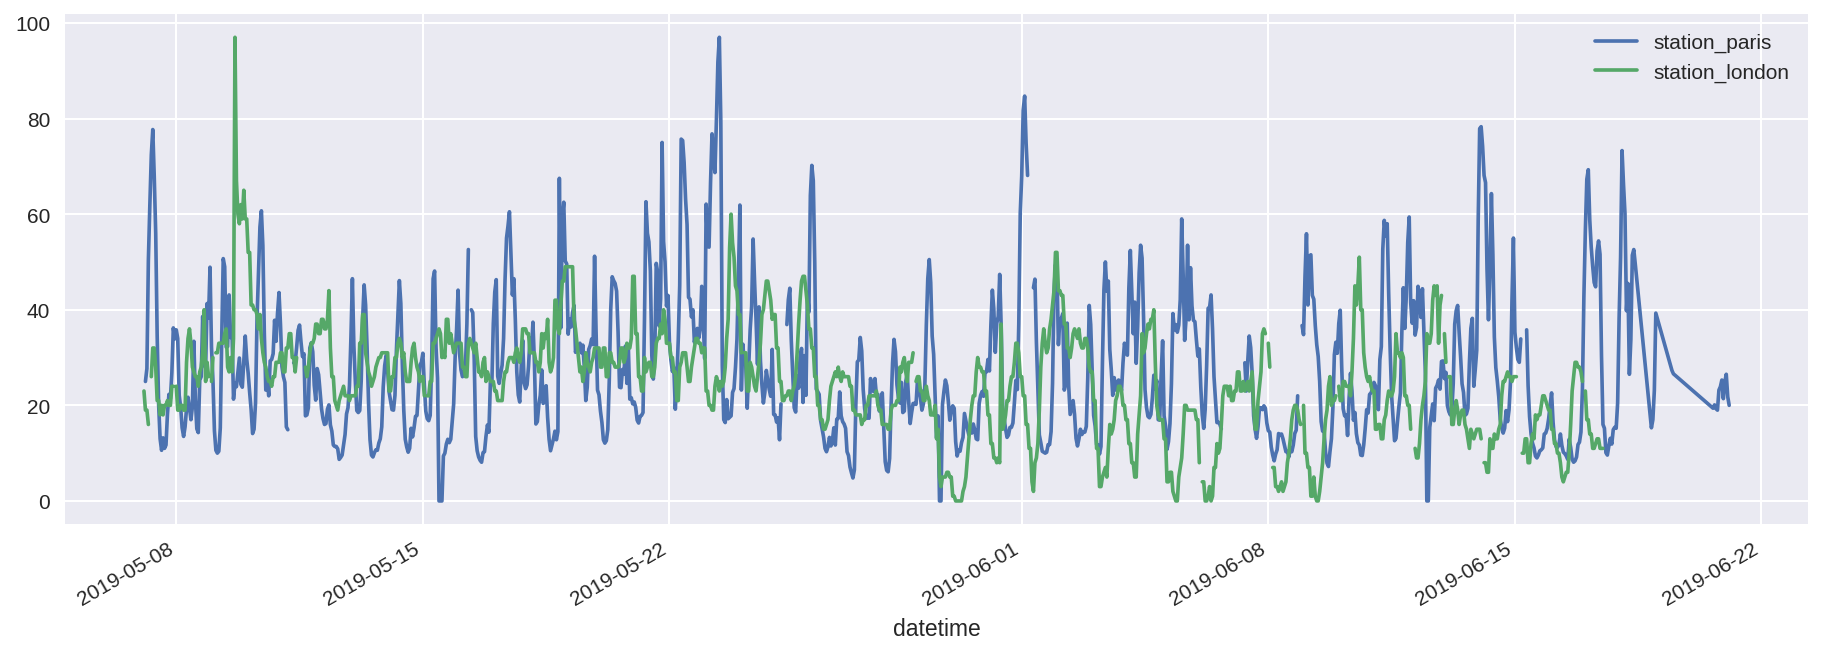

In [ ]:
# Plotting two lines (two Series) in one axes is easy with pandas's .plot()
# However, the linestyle of both lines must be the same in one calling of pandas's .plot()

# (Optional) Figure setting
plt.figure(figsize=(15,5), dpi=150)

# Plot: Alternative 1
df_air.plot( kind='line',        # default: 'line'
             x='datetime',       # default: None (use df.index)
             y=['station_paris', 'station_london'],
             linestyle='solid',  # The matplotlib linestyle
             ax=plt.gca()        # Make sure that pandas plots graphs in our desired axes
           )

# Plot: Alternative 2
#df_air.plot.line( x='datetime', y=['station_paris','station_london'], linestyle='solid', ax=plt.gca())

<Axes: xlabel='datetime'>

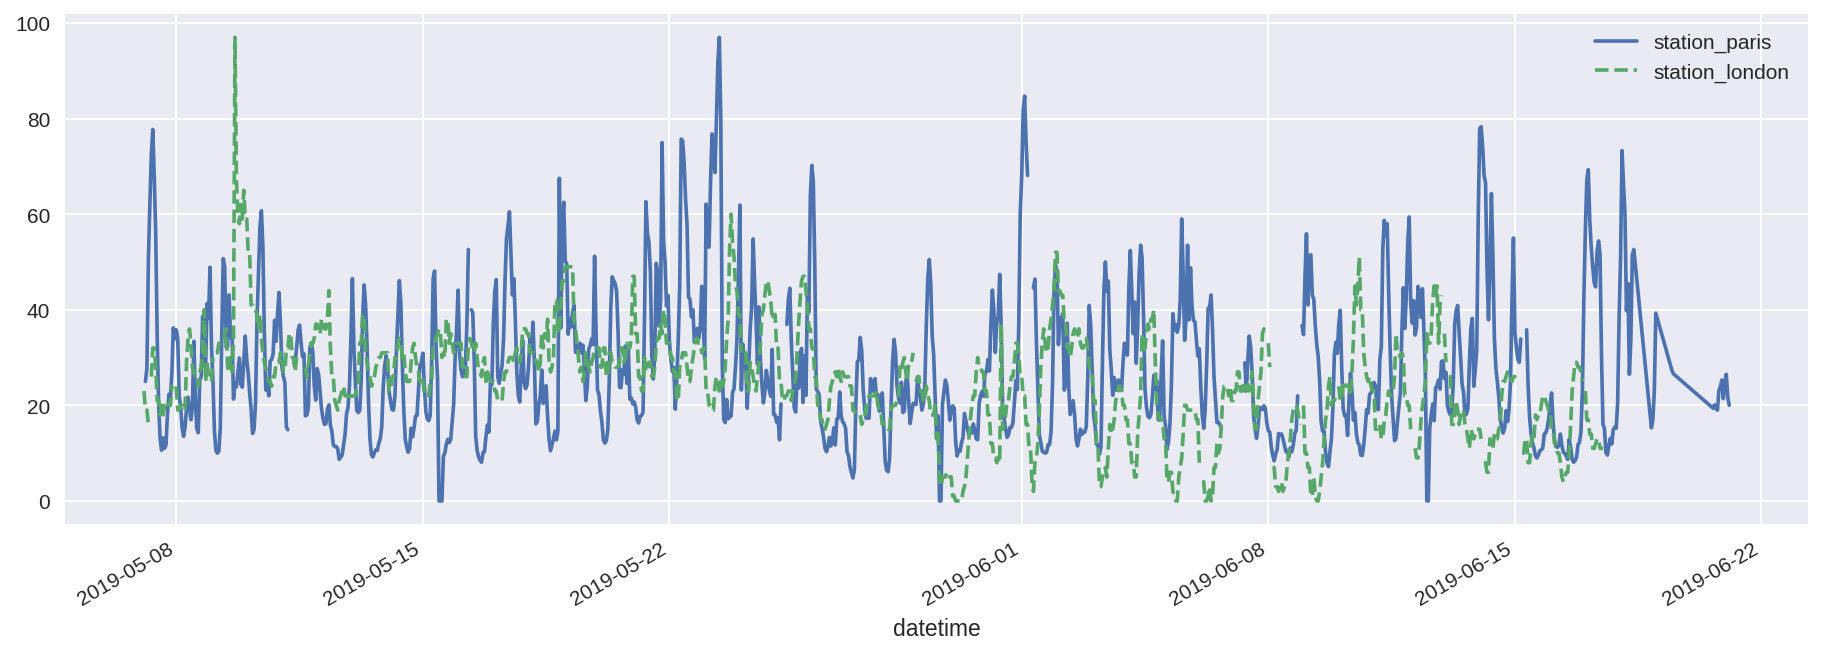

In [ ]:
# Plot two lines with different linestyles in the same axes by
# - Calling pandas's .plot() twice AND
# - Specifying the same 'ax' for both callings

# (Optional) Figure setting
plt.figure(figsize=(15,5), dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
# default: kind='line', x=None (use row labels)
### Line1
df_air.plot( kind='line',
             x='datetime', y='station_paris',  # Data to plot
             linestyle='solid',                # The matplotlib linestyle
             ax=ax        # Make sure that pandas plots graphs in our desired axes
           )
### Line2
df_air.plot( kind='line',
             x='datetime', y='station_london', # Data to plot
             linestyle='dashed',               # The matplotlib linestyle
             ax=ax        # Make sure that pandas plots graphs in our desired axes
           )

# 2. Scatter plot with plt.plot()

## 2.1 Matplotlib's pyplot

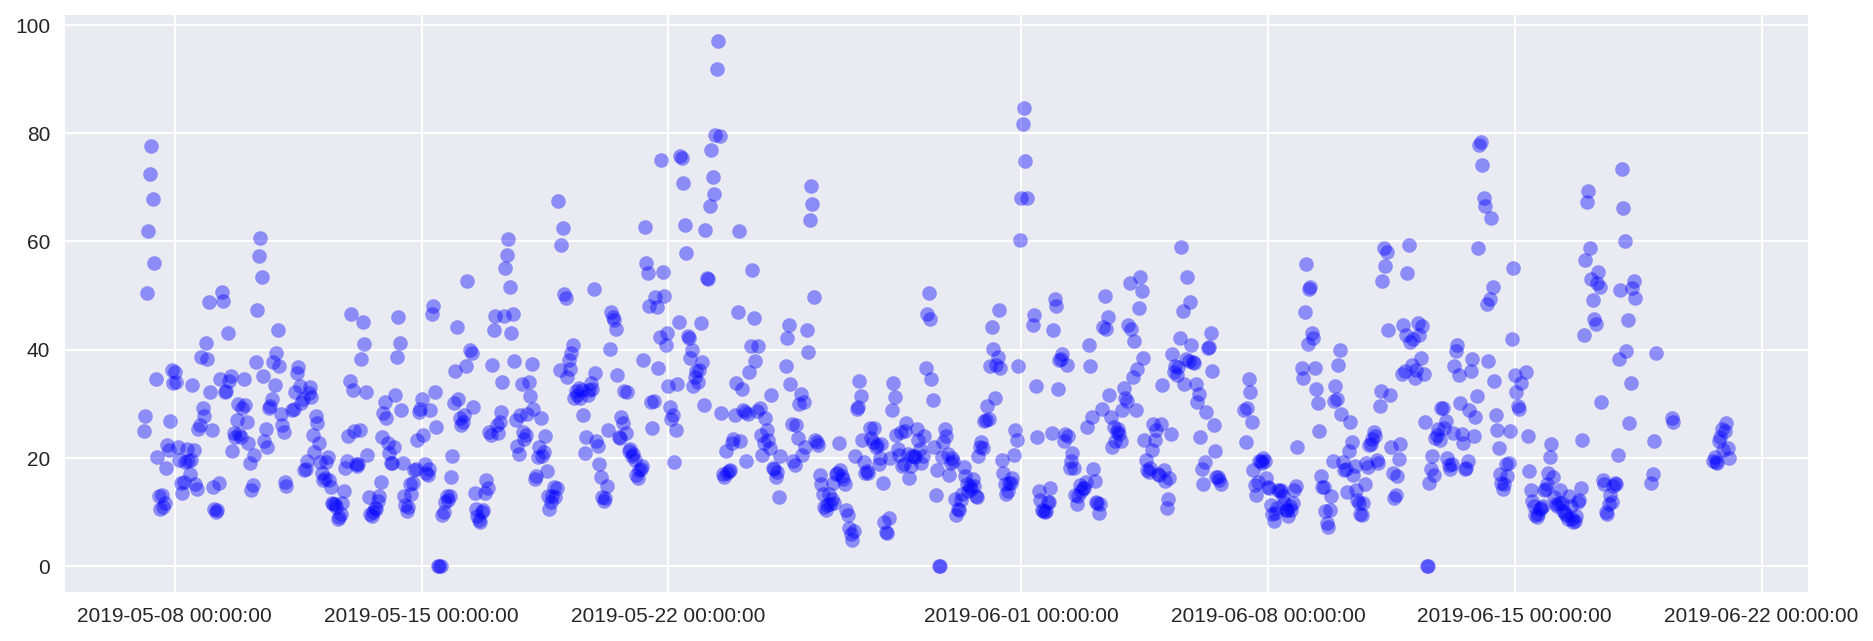

In [ ]:
# Plot markers only (no line)
# Just set the style to include only markers but no line

# (Optional) Figure setting
plt.figure(figsize=(15,5), dpi=150)

# (Optional) Set the format of datetime displayed in x-axis
ax = plt.gca()
formatter = mpl.dates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(formatter)

# Alternative 1: Plot with the given x and y
plt.plot(df_air['datetime'], df_air['station_paris'],   # x and y to plot
         color='blue', marker='o', linestyle='',        # The matplotlib linestyle
         alpha=0.4 )   # Alpha blending value, between 0 (transparent) and 1 (opaque)

# Alternative 2: Plot with the given x and y
#plt.plot(df_air['datetime'], df_air['station_paris'],'bo', alpha=0.4)

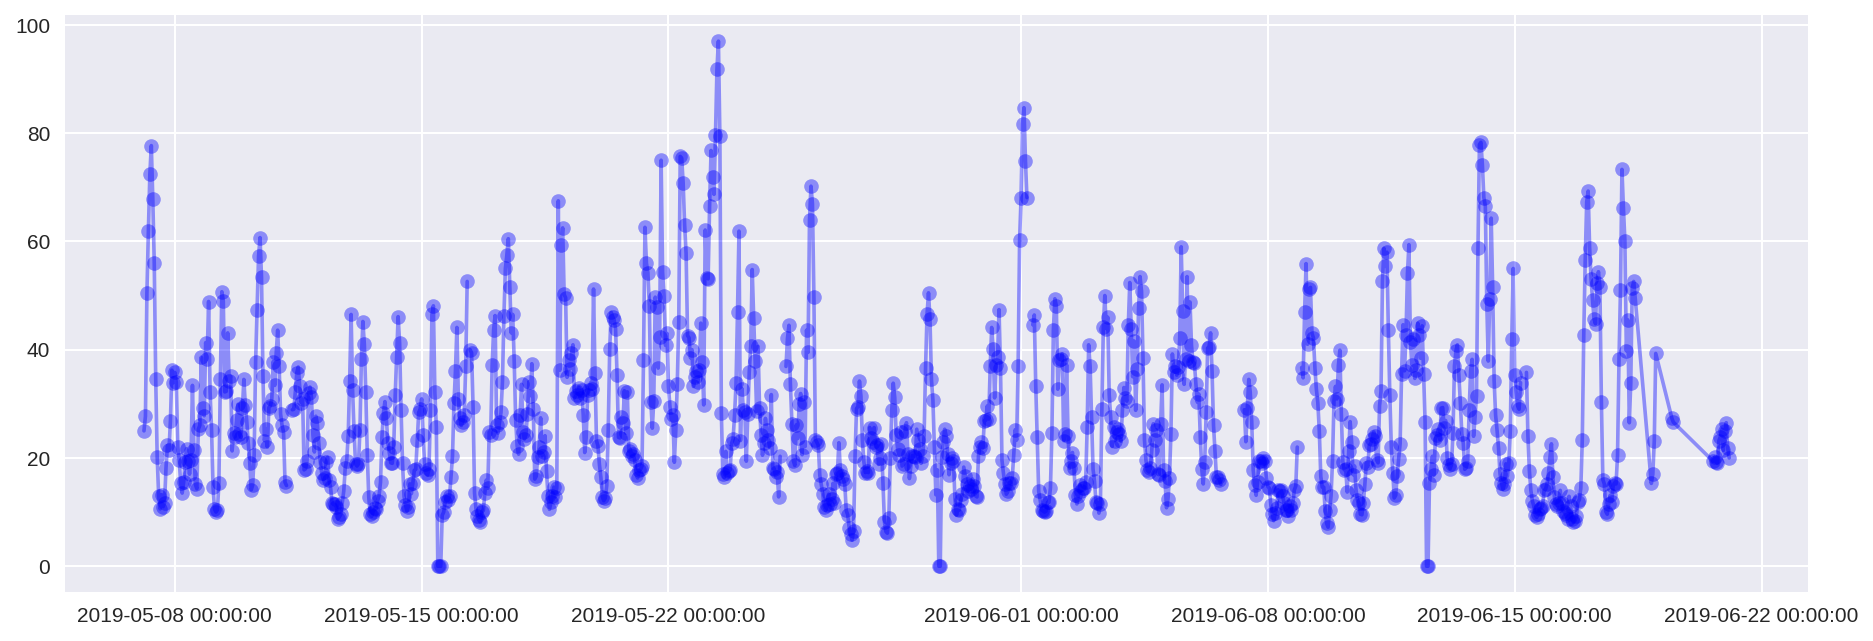

In [ ]:
# It's perfectly possible to plot both line and markers using plt.plot()

# (Optional) Figure setting
plt.figure(figsize=(15,5), dpi=150)

# (Optional) Set the format of datetime displayed in x-axis
ax = plt.gca()
formatter = mpl.dates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(formatter)

# Alternative 1: Plot with the given x and y
plt.plot(df_air['datetime'], df_air['station_paris'],    # x and y to plot
         color='blue', marker='o', linestyle='solid',    # The matplotlib linestyle
         alpha=0.4 )

# Alternative 2: Plot with the given x and y
#plt.plot(df_air['datetime'], df_air['station_paris'],'bo-', alpha=0.4)

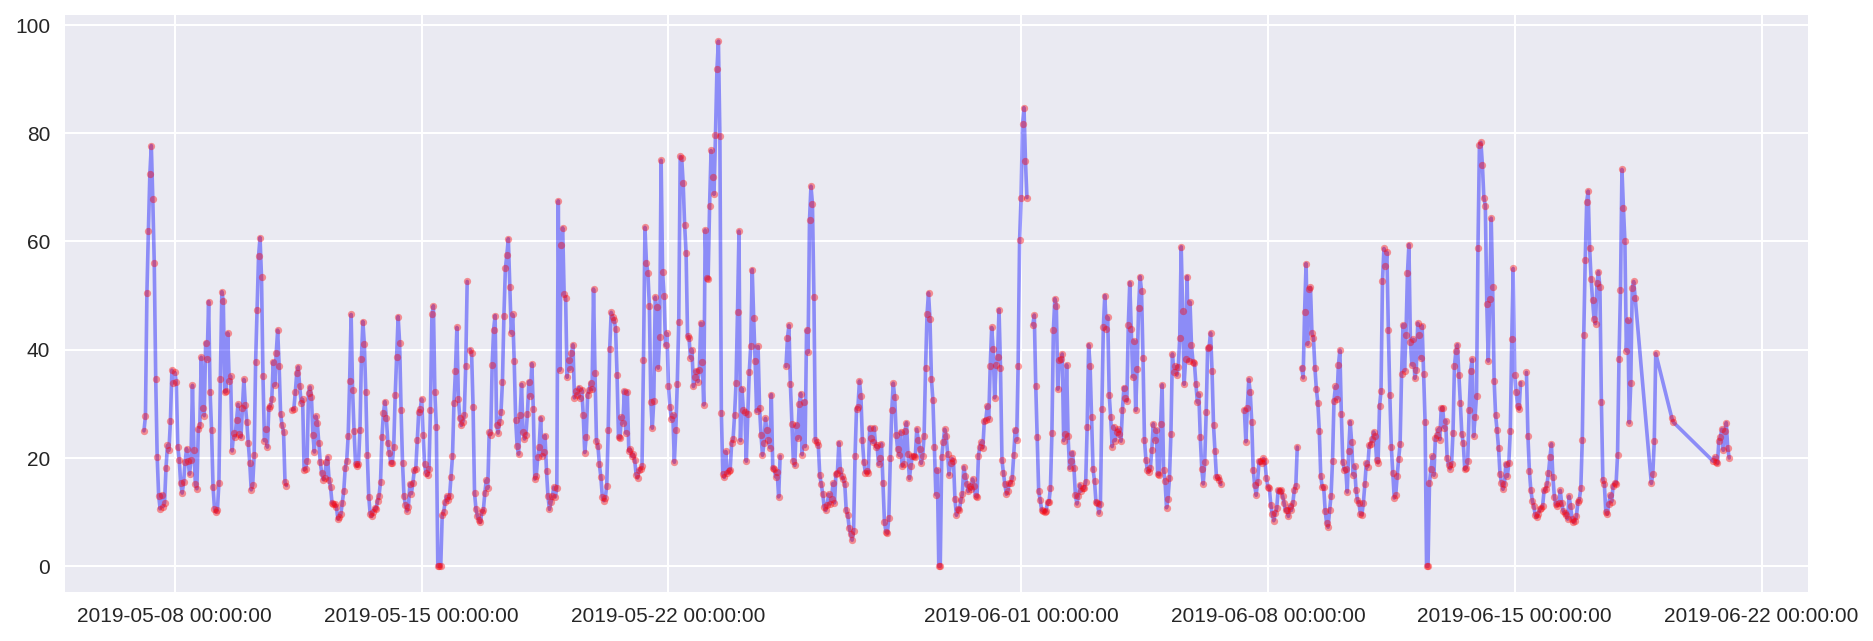

In [ ]:
# Plot line and markers with two different colors

# (Optional) Figure setting
plt.figure(figsize=(15,5), dpi=150)

# (Optional) Set the format of datetime displayed in x-axis
ax = plt.gca()
formatter = mpl.dates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(formatter)

# Plot with the given x and y
plt.plot(df_air['datetime'], df_air['station_paris'], # x and y to plot
         color='blue', linestyle='solid',       # The matplotlib style for lines
         marker='.', markerfacecolor='red',     # The matplotlib style for markers
         alpha=0.4 )

An example visualization of how other markers look like on a graph:

(0.0, 1.4)

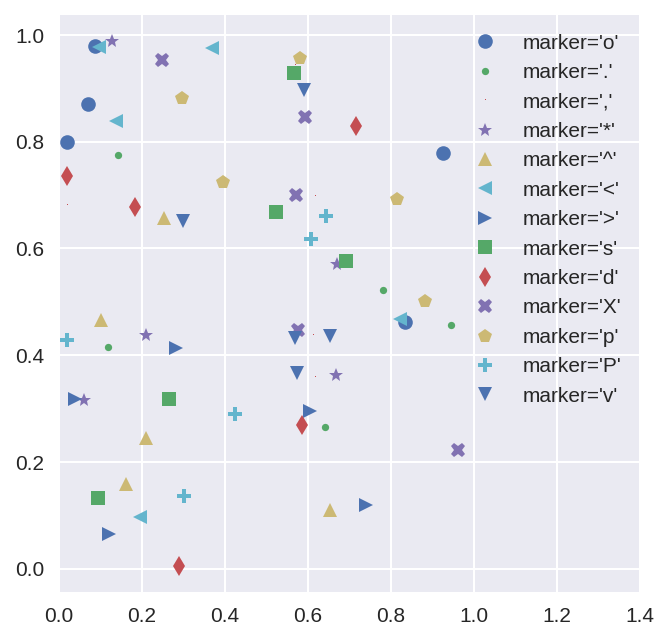

In [ ]:
# Use random numpy.ndarray as inputs

# (Optional) Figure setting
plt.figure(figsize=(5,5), dpi=150)

# Plot markers only
# Available markers in https://matplotlib.org/stable/api/markers_api.html)
for marker in ['o','.',',','*','^','<','>','s','d','X','p','P','v']:
    plt.plot( rng.rand(5), rng.rand(5),   # Five sets of randomly generated x and y (numpy.ndarray)
              linestyle='',
              marker=marker, label=f"marker='{marker}'" )

plt.legend()      # Place a legend on the current axis
plt.xlim(0, 1.4)  # Increase the scale of x-axis to avoid overlap between legend and markers

## 2.2 Pandas's .plot()

<Axes: xlabel='datetime'>

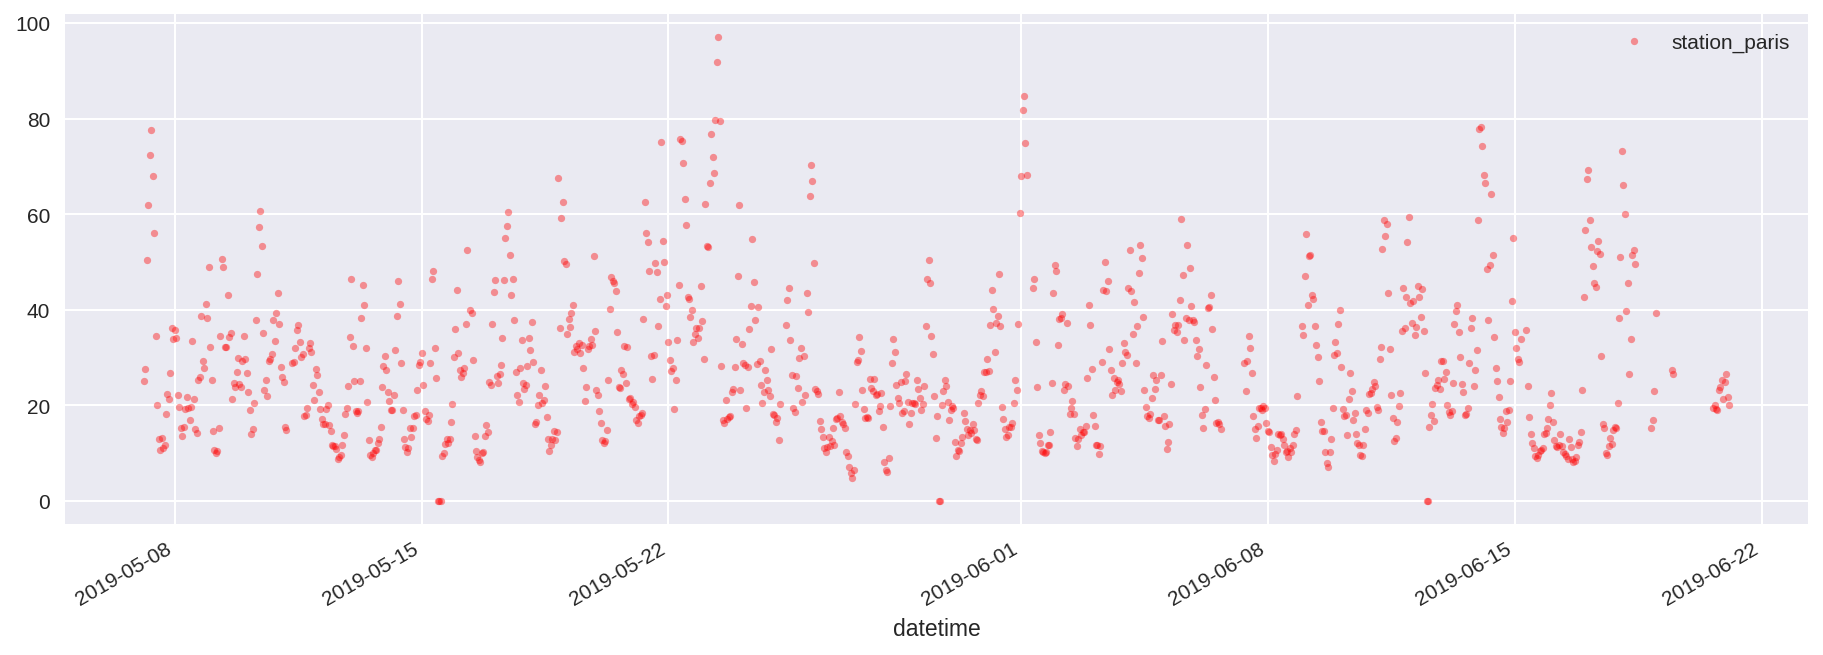

In [ ]:
# Scatter plot with pandas.plot.line()

# (Optional) Figure setting
plt.figure(figsize=(15,5), dpi=150)

# Plot: Alternative 1
# default: kind='line', x=None (use df.index)
df_air.plot(kind='line',
            x='datetime', y='station_paris',      # Data to plot
            color='blue', linestyle='',           # The matplotlib linestyle
            marker='.', markerfacecolor='red',    # The matplotlib linestyle
            alpha=0.4,
            ax=plt.gca() )       # Make sure that pandas plots in our desired axes

# Plot: Alternative 2
#df_air.plot.line(x='datetime', y='station_paris', color='blue', linestyle='', marker='.', markerfacecolor='red', alpha=0.4, ax=plt.gca())

# 3. Scatter plot with plt.scatter()

- `plt.scatter()` is more powerful than `plt.plot()`. This is because `plt.scatter()` is able to create scatter plots where the properties of each individual point (e.g., size, face color, edge color) can be individually controlled or mapped to data.
- For small amounts of data, both `plt.plot()` and `plt.scatter()` are fine. But as datasets get larger than a few thousand points, `plt.plot()` can be noticeably more efficient than `plt.scatter()`. This is because `plt.plot()` renders all points in the same way whereas `plt.scatter()` renders each point individually.

<div align=center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kfpO_fJ4bc92sffY4bxnSA.jpeg" alt="ImageNet benchmark" width=500 /></div>

## 3.1 Matplotlib's pyplot

**EX1:** Scatter plot where all markers have different sizes and colors

In [ ]:
# Four variables embedded in one graph (x, y, size, color)
# Use randomized numpy.ndarray as inputs

# Prepare 100 random data (numpy.ndarray)
x = rng.randn(100)       # Return samples from the standard normal distribution
y = rng.randn(100)       # Return samples from the standard normal distribution
colors = rng.rand(100)   # Random samples from a uniform distribution over [0, 1)
sizes = 1000 * rng.rand(100) # Random samples from a uniform distribution over [0, 1)

# Plot
plt.scatter( x, y,         # Data to plot
             s=sizes,      # Marker's size in point**2
             c=colors,     # List of colors for each data point
                           # Here we use a list of scalars to be mapped to 'cmap'
             cmap='jet',   # More in https://matplotlib.org/stable/tutorials/colors/colormaps.html
             alpha=0.4     # Alpha blending value, between 0 (transparent) and 1 (opaque)
          )

plt.colorbar()   # Add colorbar (corresponding to 'cmap') to the plot

**EX2:** Visualize the two types of pokemons in a scatter plot where the color of marker refers to the number of pokemons in the group

In [ ]:
# Prepare the data, focusing on 417 pokemons whose two types are not NaN
df = df_pokemon.groupby(by=['type1','type2'])['name'].count().reset_index()
df.rename(columns={'name':'poke_count'}, inplace=True)   # Rename the column from 'name' to 'poke_count'

# Display the dataset
df.sort_values(by='poke_count', ascending=False)

type1   type2  poke_count
91   normal  flying          26
68    grass  poison          14
4       bug  flying          13
8       bug  poison          11
142   water  ground           9
..      ...     ...         ...
64    grass   ghost           1
54    ghost   fairy           1
53    ghost  dragon           1
52    ghost    dark           1
147   water   steel           1

[148 rows x 3 columns]

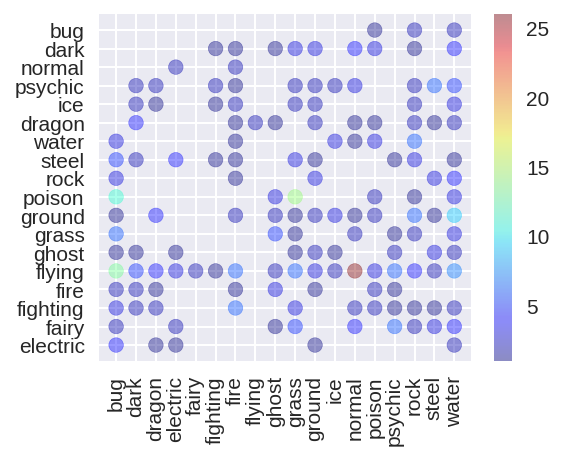

In [ ]:
# Scatter plot where all markers have different colors
# Three information are embedded in this graph: type1, type2, number of pokemons

# (Optional) Figure setting
plt.figure(figsize=(4,3), dpi=150)

# Plot
plt.scatter( df['type1'], df['type2'],  # Data to plot
             c=df['poke_count'],  # Color of each marker
             cmap='jet',
             alpha=0.4 )          # Alpha blending value, between 0 (transparent) and 1 (opaque)

# Add colorbar (corresponding to 'cmap') to the plot
plt.colorbar()

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

## 3.2 Pandas's .plot()

Repeat the **EX2** above: Visualize the two types of pokemons in a scatter plot where the color of marker refers to the number of pokemons in the group

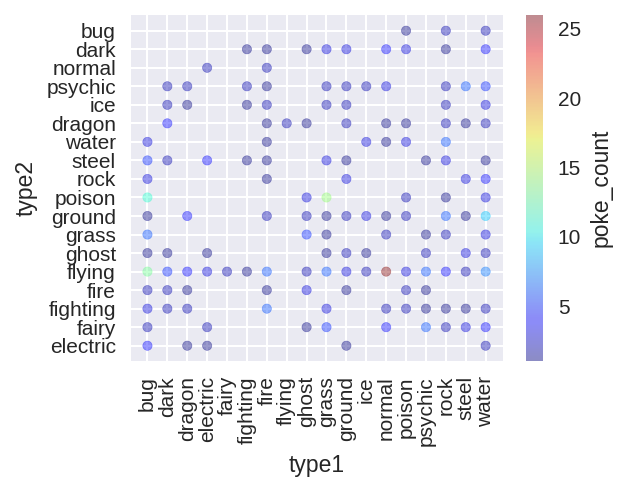

In [ ]:
# (Optional) Figure setting
plt.figure(figsize=(4,3), dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot: Alternative 1
df.plot( kind='scatter',
         x='type1', y='type2',    # Data to plot
         c='poke_count',          # Color for each marker
         colormap='jet', colorbar=True, # Use colormap and add colorbar
         alpha=0.4,
         ax=ax )                  # Make sure that the plot is in the right axes

# Plot: Alternative 2
#df.plot.scatter(x='type1', y='type2', c='poke_count', colormap='jet', colorbar=True, alpha=0.4, ax=ax)

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

# 4. Bar plot

**Question:** Inspect the number of players in each team regarding each NBA season

In [ ]:
# Prepare the data as a pivot table

# Count the number of players in each team regarding each season
df = df_nba.pivot_table(index='season', columns='team_abbreviation', values='player_name', aggfunc='count')
df

team_abbreviation   ATL   BKN   BOS   CHA   CHH   CHI   CLE   DAL   DEN   DET  \
season                                                                          
1996-97            17.0   NaN  17.0   NaN  13.0  15.0  13.0  17.0  17.0  14.0   
1997-98            16.0   NaN  14.0   NaN  15.0  15.0  16.0  16.0  15.0  14.0   
1998-99            14.0   NaN  15.0   NaN  15.0  15.0  16.0  14.0  16.0  17.0   
1999-00            13.0   NaN  14.0   NaN  17.0  17.0  18.0  17.0  15.0  14.0   
2000-01            16.0   NaN  15.0   NaN  15.0  16.0  18.0  15.0  15.0  14.0   
2001-02            18.0   NaN  14.0   NaN  14.0  13.0  15.0  17.0  17.0  15.0   
2002-03            20.0   NaN  15.0   NaN   NaN  15.0  12.0  16.0  16.0  15.0   
2003-04            16.0   NaN  14.0   NaN   NaN  16.0  15.0  13.0  15.0  13.0   
2004-05            17.0   NaN  12.0  17.0   NaN  15.0  16.0  14.0  15.0  15.0   
2005-06            13.0   NaN  14.0  15.0   NaN  17.0  15.0  16.0  17.0  15.0   
2006-07            18.0   NaN  16.0  16.0   NaN  14.0  15.0  15.0  14.0  15.0   
2007-08            12.0   NaN  15.0  13.0   NaN  16.0  16.0  15.0  15.0  15.0   
2008-09            15.0   NaN  15.0  17.0   NaN  13.0  16.0  15.0  13.0  13.0   
2009-10            14.0   NaN  15.0  15.0   NaN  15.0  15.0  13.0  13.0  14.0   
2010-11            14.0   NaN  16.0  16.0   NaN  14.0  16.0  15.0  14.0  13.0   
2011-12            15.0   NaN  17.0  15.0   NaN  14.0  16.0  15.0  15.0  14.0   
2012-13            16.0  17.0  17.0  18.0   NaN  14.0  16.0  21.0  15.0  14.0   
2013-14            16.0  17.0  16.0  15.0   NaN  16.0  18.0  15.0  14.0  15.0   
2014-15            15.0  16.0  14.0  16.0   NaN  14.0  17.0  16.0  18.0  15.0   
2015-16            15.0  17.0  15.0  16.0   NaN  15.0  17.0  15.0  16.0  15.0   
2016-17            18.0  18.0  15.0  17.0   NaN  16.0  19.0  19.0  17.0  15.0   
2017-18            19.0  18.0  19.0  17.0   NaN  19.0  16.0  21.0  17.0  18.0   
2018-19            18.0  17.0  16.0  17.0   NaN  18.0  21.0  16.0  18.0  17.0   
2019-20            18.0  22.0  17.0  14.0   NaN  17.0  18.0  18.0  17.0  19.0   
2020-21            17.0  21.0  18.0  17.0   NaN  17.0  21.0  17.0  18.0  17.0   
2021-22            21.0  17.0  22.0  17.0   NaN  20.0  22.0  21.0  20.0  25.0   

team_abbreviation  ...   PHI   PHX   POR   SAC   SAS   SEA   TOR   UTA   VAN  \
season             ...                                                         
1996-97            ...  15.0  16.0  16.0  14.0  16.0  16.0  20.0  12.0  15.0   
1997-98            ...  16.0  13.0  17.0  15.0  14.0  15.0  19.0  13.0  13.0   
1998-99            ...  16.0  17.0  15.0  14.0  14.0  16.0  15.0  14.0  15.0   
1999-00            ...  15.0  17.0  14.0  14.0  14.0  15.0  15.0  12.0  15.0   
2000-01            ...  16.0  13.0  16.0  14.0  15.0  14.0  15.0  14.0  14.0   
2001-02            ...  19.0  15.0  15.0  13.0  15.0  16.0  16.0  14.0   NaN   
2002-03            ...  14.0  14.0  15.0  14.0  13.0  14.0  18.0  13.0   NaN   
2003-04            ...  14.0  12.0  19.0  13.0  17.0  14.0  16.0  17.0   NaN   
2004-05            ...  14.0  14.0  16.0  15.0  16.0  15.0  14.0  16.0   NaN   
2005-06            ...  16.0  16.0  14.0  14.0  15.0  14.0  15.0  15.0   NaN   
2006-07            ...  16.0  14.0  16.0  14.0  15.0  16.0  16.0  14.0   NaN   
2007-08            ...  13.0  13.0  13.0  17.0  17.0  17.0  16.0  14.0   NaN   
2008-09            ...  13.0  14.0  14.0  14.0  19.0   NaN  16.0  15.0   NaN   
2009-10            ...  14.0  14.0  15.0  16.0  14.0   NaN  15.0  13.0   NaN   
2010-11            ...  15.0  14.0  16.0  15.0  16.0   NaN  17.0  16.0   NaN   
2011-12            ...  16.0  13.0  14.0  14.0  19.0   NaN  17.0  15.0   NaN   
2012-13            ...  15.0  15.0  15.0  14.0  15.0   NaN  15.0  14.0   NaN   
2013-14            ...  18.0  15.0  15.0  16.0  15.0   NaN  15.0  17.0   NaN   
2014-15            ...  20.0  17.0  16.0  17.0  15.0   NaN  16.0  16.0   NaN   
2015-16            ...  14.0  16.0  16.0  15.0  18.

In [ ]:
# Just for easy debugging, choose only the first 6 teams for further visualization
df = df.iloc[ :, :6 ]
df

team_abbreviation   ATL   BKN   BOS   CHA   CHH   CHI
season                                               
1996-97            17.0   NaN  17.0   NaN  13.0  15.0
1997-98            16.0   NaN  14.0   NaN  15.0  15.0
1998-99            14.0   NaN  15.0   NaN  15.0  15.0
1999-00            13.0   NaN  14.0   NaN  17.0  17.0
2000-01            16.0   NaN  15.0   NaN  15.0  16.0
2001-02            18.0   NaN  14.0   NaN  14.0  13.0
2002-03            20.0   NaN  15.0   NaN   NaN  15.0
2003-04            16.0   NaN  14.0   NaN   NaN  16.0
2004-05            17.0   NaN  12.0  17.0   NaN  15.0
2005-06            13.0   NaN  14.0  15.0   NaN  17.0
2006-07            18.0   NaN  16.0  16.0   NaN  14.0
2007-08            12.0   NaN  15.0  13.0   NaN  16.0
2008-09            15.0   NaN  15.0  17.0   NaN  13.0
2009-10            14.0   NaN  15.0  15.0   NaN  15.0
2010-11            14.0   NaN  16.0  16.0   NaN  14.0
2011-12            15.0   NaN  17.0  15.0   NaN  14.0
2012-13            16.0  17.0  17.0  18.0   NaN  14.0
2013-14            16.0  17.0  16.0  15.0   NaN  16.0
2014-15            15.0  16.0  14.0  16.0   NaN  14.0
2015-16            15.0  17.0  15.0  16.0   NaN  15.0
2016-17            18.0  18.0  15.0  17.0   NaN  16.0
2017-18            19.0  18.0  19.0  17.0   NaN  19.0
2018-19            18.0  17.0  16.0  17.0   NaN  18.0
2019-20            18.0  22.0  17.0  14.0   NaN  17.0
2020-21            17.0  21.0  18.0  17.0   NaN  17.0
2021-22            21.0  17.0  22.0  17.0   NaN  20.0

## 4.1 Bar plot with matplotlib's pyplot

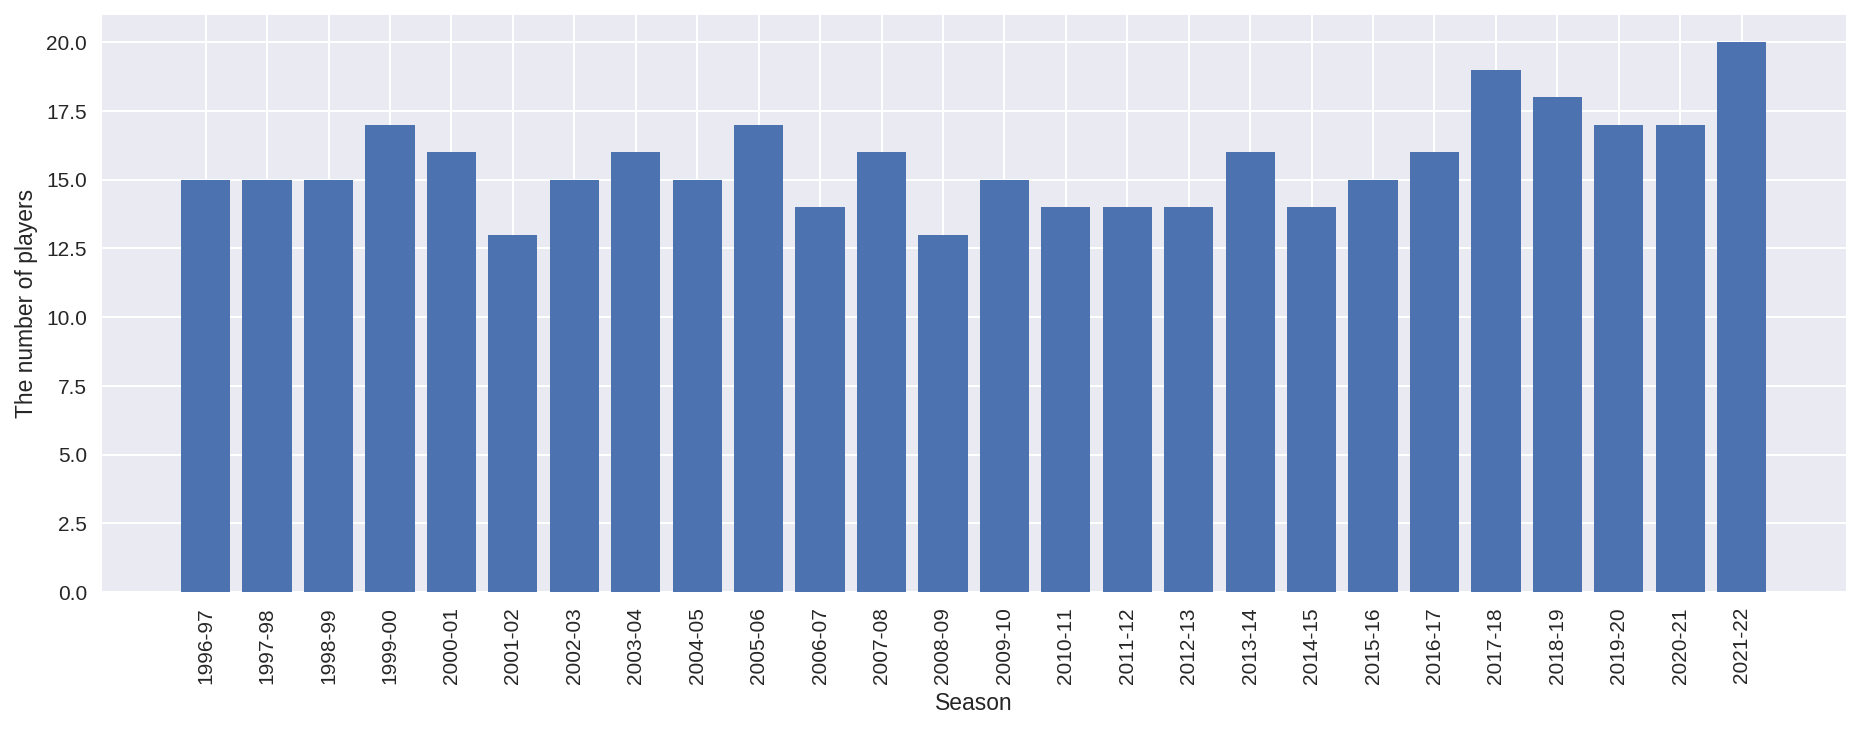

In [ ]:
# Matplotlib: Plot one VERTICAL bar graph of one team ('CHI')

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
plt.bar(x=df.index,         # In this example, df.index refers to season
        height=df['CHI'])

plt.xlabel("Season")                  # Add x-labels
plt.ylabel("The number of players")   # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

([<matplotlib.axis.XTick at 0x7945b5c13dc0>,
 [Text(0, 0, 'zero'),
  Text(5, 0, 'five'),
  Text(10, 0, 'ten'),
  Text(15, 0, 'fifteen'),
  Text(20, 0, 'twenty')])

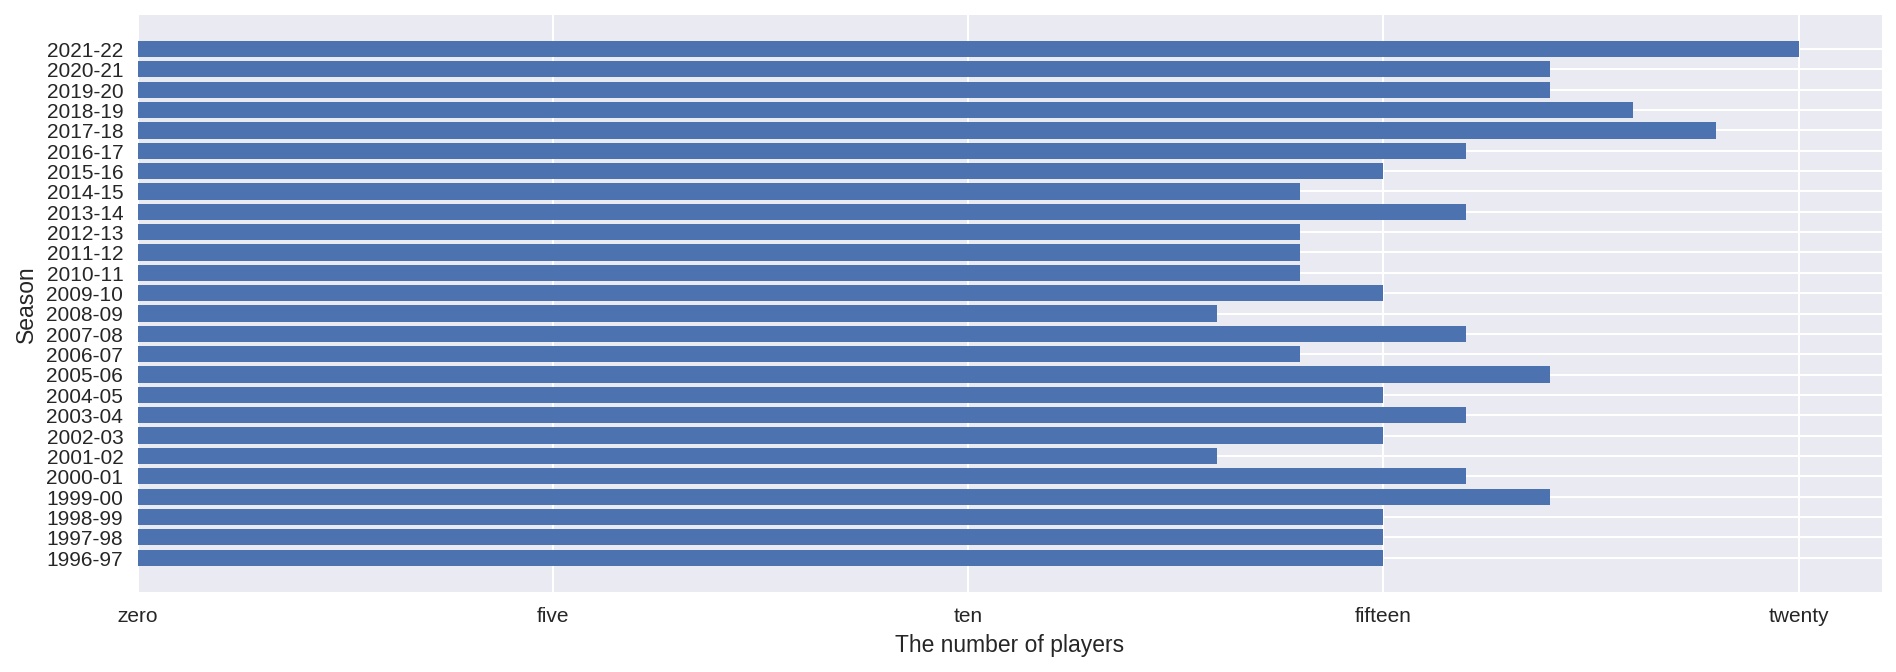

In [ ]:
# Matplotlib: Plot one HORIZONTAL bar graph of one team ('CHI')

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
plt.barh( y=df.index,       # In this example, df.index refers to season
          width=df['CHI'] )

plt.xlabel("The number of players") # Add x-labels
plt.ylabel("Season")                # Add y-labels

# (Optional) Change the x-tick's locations and labels to our preferred values
plt.xticks( ticks=range(0,21,5),                              # (default=None): List of the xtick location
            labels=['zero','five','ten','fifteen','twenty'] , # (default=None): List of the labels corresponding to each xtick
)

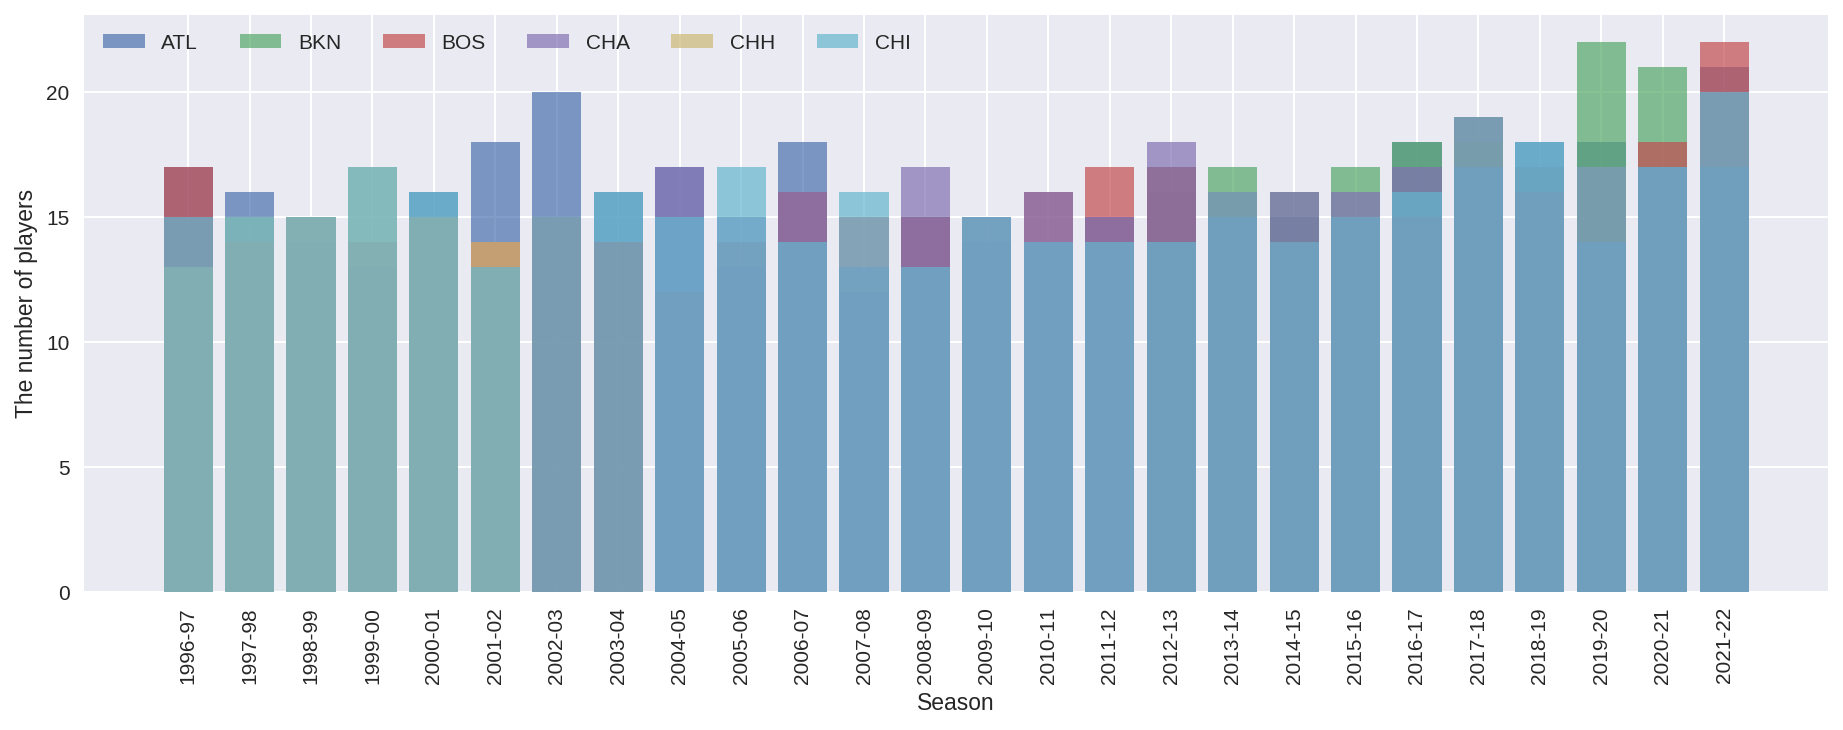

In [ ]:
# Matplotlib: Plot VERTICAL bar graphs for all teams
# BUT the graphs are now 100% overlapping!!!

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
for team_name in df.columns:
  plt.bar( x=df.index,            # season
           height=df[team_name],  # the number of players
           label=team_name,       # value to appear in the legend of each team
           alpha=0.7,
  )

# (Optional) Add legend to the graph
plt.legend(loc='upper left',      # Place legend at which location
           ncol=len(df.columns))  # How many columns to diplay the legend (default=1)

# (Optional) Add labels to x and y axes
plt.xlabel("Season")
plt.ylabel("The number of players")

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

For plotting a clustered bar chart with matplotlib, our X needs to be numerical to adjust the bar’s position manually as a code snippet below. We also need to use plt.bar() for each set of bars.

```
    plt.bar(x - 0.5, y[0], width=1 )   # Shift bars to the left to avoid overlapping
    plt.bar(x + 0.5, y[1], width=1)    # Shift bars to the right to avoid overlapping
```

## 4.2 Bar plot with pandas's .plot()

(-0.5, 29.0)

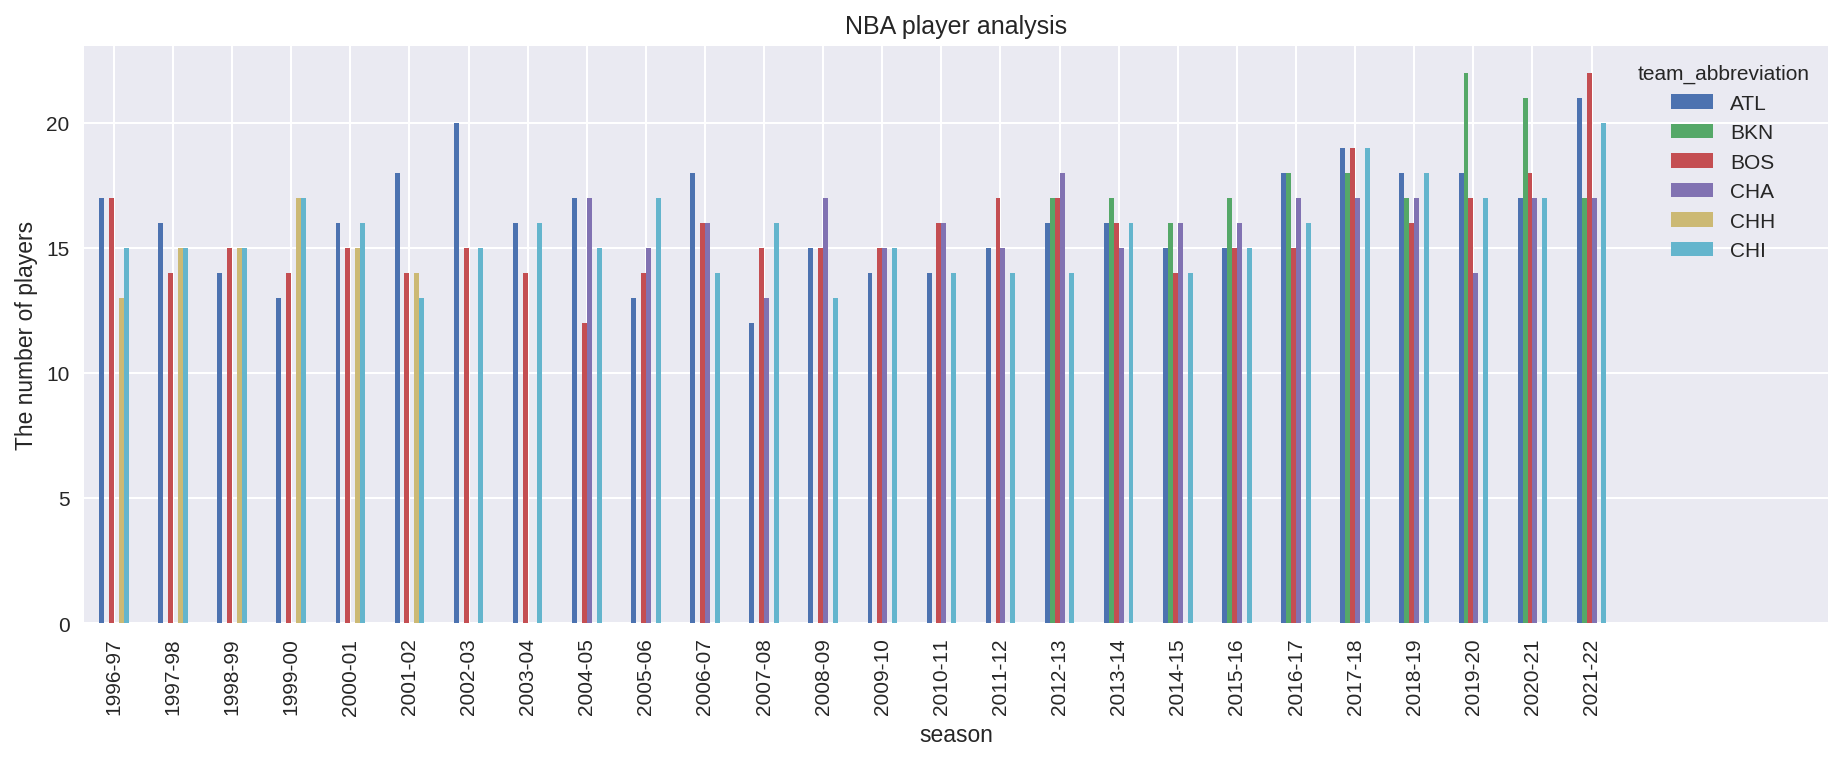

In [ ]:
# Pandas: Successfully (also easily and intuitively) plot a clustered bar graph without overlap
# VERTICAL bar graphs

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot: Alternative 1
df.plot( kind='bar', ax=ax,
         title='NBA player analysis', ylabel='The number of players' ) # Add other graph components

# Plot: Alternative 2
#df.plot.bar(ax=ax, title='NBA player analysis', ylabel='The number of players')

# Lengthen the x-axis so that the legend doesn't overlap with data
left, right = ax.get_xlim()    # Get the current left and right limits
ax.set_xlim(left, right+3.5)   # Set xlim to the new values

## 4.3 Stacked bar plot with matplotlib's pyplot

In [ ]:
# Remind that the current dataframe includes NAN in many columns

df.isna().sum()   # How many NA values each team has

team_abbreviation
ATL     0
BKN    16
BOS     0
CHA     8
CHH    20
CHI     0
dtype: int64

In [ ]:
# Remind that the current dataframe includes NAN in many rows

df.isna().sum(axis=1)   # How many NA values each season has

season
1996-97    2
1997-98    2
1998-99    2
1999-00    2
2000-01    2
2001-02    2
2002-03    3
2003-04    3
2004-05    2
2005-06    2
2006-07    2
2007-08    2
2008-09    2
2009-10    2
2010-11    2
2011-12    2
2012-13    1
2013-14    1
2014-15    1
2015-16    1
2016-17    1
2017-18    1
2018-19    1
2019-20    1
2020-21    1
2021-22    1
dtype: int64

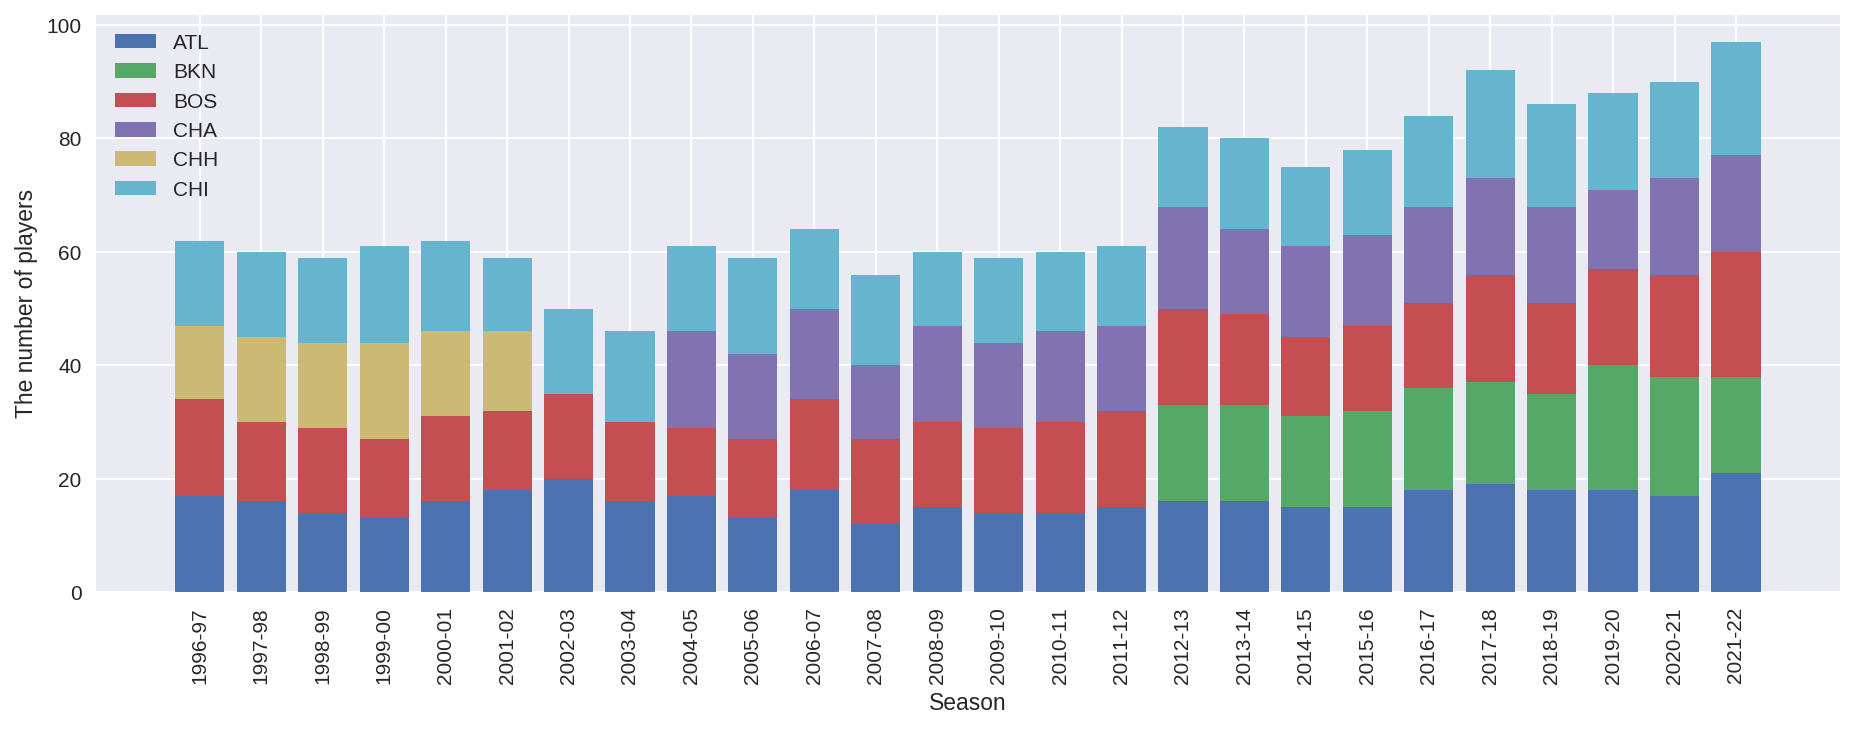

In [ ]:
# Plot VERTICAL stacked bar graphs for all teams using the 'bottom' parameter

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
bottoms = pd.Series( [0] * df.shape[0] )
bottoms = 0     # Each bar plot of the first team has the bottom of bar at y=0
for i, team_name in enumerate(df.columns):
  plt.bar( x=df.index, height=df[team_name],
           label=team_name,  # Set label to be used in the legend
           bottom=bottoms )  # The y coordinates of the bars bases (default:0)
  bottoms += df[team_name].fillna(0)   # Fill NA with zero and do addition

plt.legend()          # Add legend to the graph
plt.xlabel("Season")                  # Add x-labels
plt.ylabel("The number of players")   # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

## 4.4 Stacked bar plot with pandas's .plot()

Text(0.5, 0, 'The number of players')

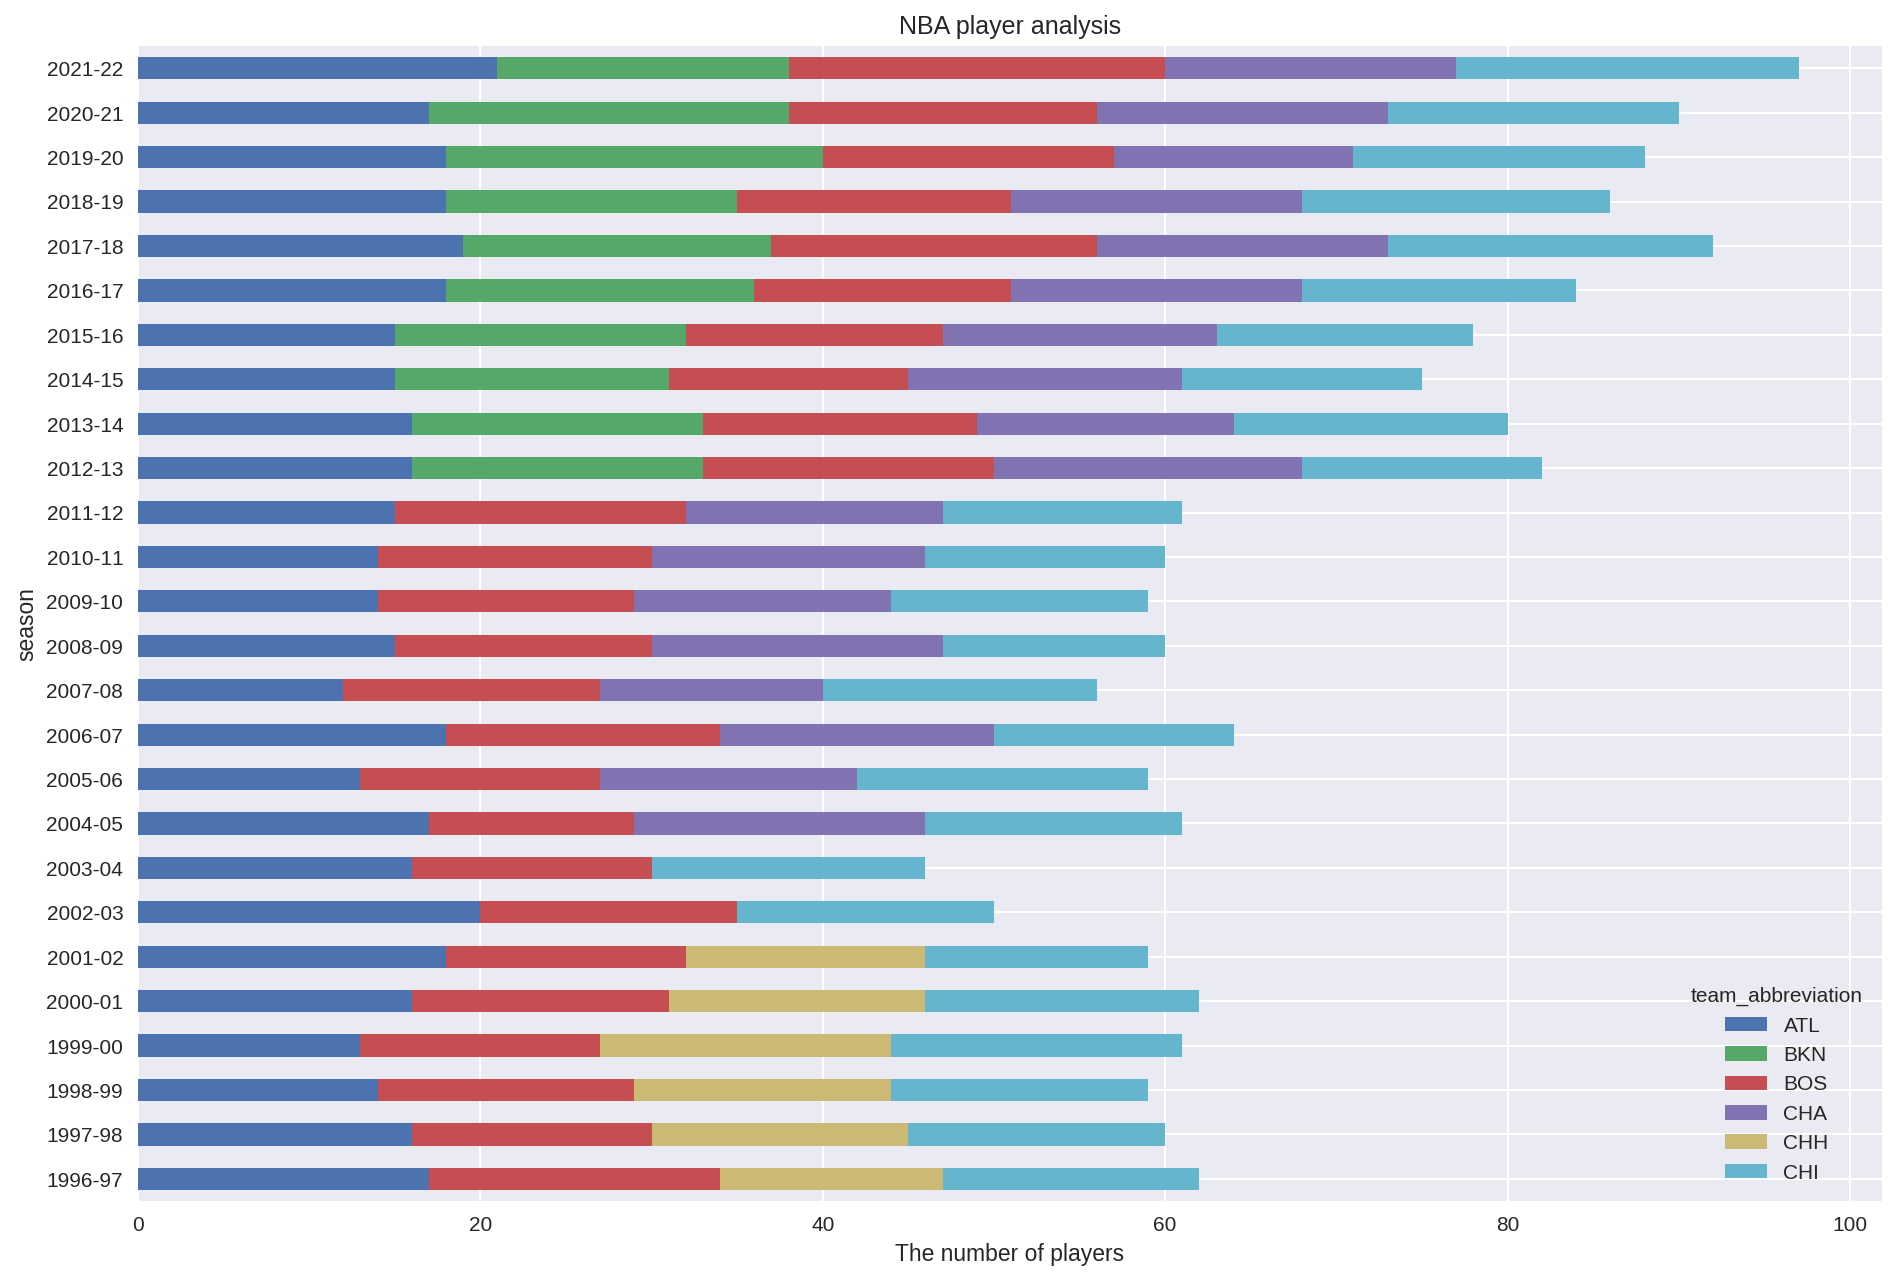

In [ ]:
# Easily plot stacked bar graphs (HORIZONTAL bar graphs)
# Pandas automatically handles (skips) NaN values for us

# (Optional) Figure setting
plt.figure(figsize=(15,10),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot: Alternative 1
df.plot( kind='barh', ax=ax,
         stacked=True,                 # default:stacked=False
         title='NBA player analysis' ) # Add other graph components

# Plot: Alternative 2
#df.plot.barh(ax=ax, stacked=True, title='NBA player analysis')

# Set the label in x-axis
ax.set_xlabel('The number of players')

# 5. Error bar

**Question:** Inspect the average ages of each team in each NBA season, together with SD

In [ ]:
# Prepare the data (average age of each team in each season) as a pivot table
df_mean = df_nba.pivot_table(index='season', columns='team_abbreviation', values='age', aggfunc='mean')
df_mean

team_abbreviation        ATL        BKN        BOS        CHA        CHH  \
season                                                                     
1996-97            27.529412        NaN  27.647059        NaN  30.230769   
1997-98            28.250000        NaN  25.857143        NaN  29.733333   
1998-99            28.500000        NaN  25.733333        NaN  29.400000   
1999-00            26.692308        NaN  26.642857        NaN  27.941176   
2000-01            26.187500        NaN  26.333333        NaN  28.933333   
2001-02            27.000000        NaN  27.071429        NaN  28.357143   
2002-03            27.850000        NaN  28.666667        NaN        NaN   
2003-04            27.187500        NaN  26.285714        NaN        NaN   
2004-05            27.529412        NaN  25.333333  25.411765        NaN   
2005-06            23.615385        NaN  25.071429  25.400000        NaN   
2006-07            25.277778        NaN  25.187500  27.125000        NaN   
2007-08            24.250000        NaN  28.866667  27.538462        NaN   
2008-09            25.733333        NaN  27.600000  26.529412        NaN   
2009-10            27.214286        NaN  29.066667  27.133333        NaN   
2010-11            27.785714        NaN  29.125000  27.000000        NaN   
2011-12            30.133333        NaN  28.647059  26.266667        NaN   
2012-13            27.187500  28.058824  27.882353  26.666667        NaN   
2013-14            27.125000  29.529412  26.250000  26.866667        NaN   
2014-15            27.866667  27.687500  25.214286  26.125000        NaN   
2015-16            28.266667  25.941176  24.466667  26.250000        NaN   
2016-17            28.500000  26.555556  25.733333  25.823529        NaN   
2017-18            25.210526  25.222222  25.789474  25.882353        NaN   
2018-19            25.111111  25.470588  25.875000  26.411765        NaN   
2019-20            25.666667  26.909091  25.000000  24.642857        NaN   
2020-21            25.352941  28.238095  24.777778  24.705882        NaN   
2021-22            26.142857  28.470588  27.227273  25.117647        NaN   

team_abbreviation        CHI        CLE        DAL        DEN        DET  ...  \
season                                                                    ...   
1996-97            30.666667  26.615385  26.941176  27.352941  27.857143  ...   
1997-98            30.600000  26.375000  26.250000  26.400000  27.785714  ...   
1998-99            28.066667  26.937500  26.642857  25.250000  27.470588  ...   
1999-00            27.294118  27.166667  26.823529  26.533333  28.357143  ...   
2000-01            23.625000  28.000000  26.733333  28.666667  27.785714  ...   
2001-02            25.076923  26.533333  28.647059  27.705882  28.466667  ...   
2002-03            25.466667  23.333333  29.750000  24.750000  29.466667  ...   
2003-04            27.187500  25.866667  28.692308  26.666667  28.000000  ...   
2004-05            26.333333  26.687500  27.928571  28.333333  28.666667  ...   
2005-06            26.000000  26.733333  27.687500  28.000000  28.400000  ...   
2006-07            26.357143  27.866667  28.466667  26.785714  28.733333  ...   
2007-08            24.312500  28.437500  30.066667  27.600000  28.266667  ...   
2008-09            27.307692  27.062500  28.266667  27.153846  27.769231  ...   
2009-10            27.466667  28.200000  30.692308  27.923077  27.428571  ...   
2010-11            28.428571  26.375000  29.733333  26.785714  27.846154  ...   
2011-12            28.642857  25.875000  30.066667  26.000000  27.571429  ...   
2012-13            28.428571  25.437500  28.476190  25.000000  25.928571  ...   
2013-14            28.625000  24.888889  28.733333  25.714286  26.066667  ...   
2014-15            28.571429  28.588235  29.500000  25.666667  27.466667  ...   
2015-16            27.333333  29.058824  30.066667  25.437500  26.333333  ...   
2016-17            26.000000  30.421053  27.263158  26.352941  25.933333  ...   
2017-18 

In [ ]:
# Prepare the data (SD age of each team in each season) as a pivot table
df_sd = df_nba.pivot_table(index='season', columns='team_abbreviation', values='age', aggfunc='std')
df_sd

team_abbreviation       ATL       BKN       BOS       CHA       CHH       CHI  \
season                                                                          
1996-97            3.337620       NaN  4.702940       NaN  4.603510  4.820591   
1997-98            3.924283       NaN  3.158801       NaN  2.016598  4.355620   
1998-99            5.185038       NaN  3.453087       NaN  4.136942  4.802777   
1999-00            3.966203       NaN  3.521519       NaN  5.080239  4.454839   
2000-01            3.902456       NaN  2.919556       NaN  4.802777  2.390955   
2001-02            3.662208       NaN  3.668248       NaN  4.162232  5.203549   
2002-03            2.796144       NaN  5.009515       NaN       NaN  4.501851   
2003-04            3.449034       NaN  4.375255       NaN       NaN  5.492040   
2004-05            5.724046       NaN  4.696872  2.762671       NaN  5.232681   
2005-06            2.631174       NaN  3.668248  2.443651       NaN  3.758324   
2006-07            3.357267       NaN  4.182802  4.209117       NaN  4.634439   
2007-08            2.340357       NaN  5.475486  4.332347       NaN  2.272114   
2008-09            3.127451       NaN  4.484895  3.809817       NaN  4.939376   
2009-10            3.826599       NaN  4.527167  4.517690       NaN  4.748935   
2010-11            3.378178       NaN  4.978286  3.669696       NaN  4.127102   
2011-12            3.795988       NaN  4.540666  4.558613       NaN  4.253635   
2012-13            3.390551  4.365641  4.526068  4.144451       NaN  4.362679   
2013-14            3.947573  4.976415  3.768289  4.206571       NaN  5.110447   
2014-15            4.172472  3.893905  3.378178  4.645787       NaN  4.767103   
2015-16            4.216747  3.051036  2.799660  3.130495       NaN  4.353433   
2016-17            4.287465  4.076074  3.750556  3.539691       NaN  3.741657   
2017-18            2.780467  3.352884  3.441236  3.218741       NaN  3.059832   
2018-19            5.223126  3.676235  3.757215  4.184179       NaN  2.502939   
2019-20            5.562479  4.868843  3.335416  2.648865       NaN  3.052241   
2020-21            4.107024  3.910304  3.573687  3.441742       NaN  4.528504   
2021-22            4.269493  5.658154  4.699866  4.270280       NaN  3.498496   

team_abbreviation       CLE       DAL       DEN       DET  ...       PHI  \
season                                                     ...             
1996-97            3.640935  4.736436  4.107024  4.737041  ...  3.453087   
1997-98            3.263434  3.255764  3.718679  4.838604  ...  4.883646   
1998-99            3.511291  4.829511  2.516611  3.858718  ...  5.213764   
1999-00            3.899472  4.405044  3.204164  2.924884  ...  3.136574   
2000-01            3.564531  4.300609  4.169047  3.577248  ...  3.632607   
2001-02            4.453998  4.595394  4.538236  4.155318  ...  4.425471   
2002-03            2.640018  3.336665  3.803507  4.373078  ...  3.997252   
2003-04            3.907258  3.497252  4.099942  4.041452  ...  4.047113   
2004-05            5.082240  4.698024  4.011887  5.023753  ...  4.195759   
2005-06            4.605380  4.771006  4.077377  4.939636  ...  4.195235   
2006-07            5.262627  5.383396  3.945369  5.049281  ...  4.177320   
2007-08            4.162832  4.008325  4.548155  5.020909  ...  4.567163   
2008-09            4.538263  4.250490  4.038278  4.585373  ...  5.033223   
2009-10            5.045507  3.772369  4.212314  4.291571  ...  4.734721   
2010-11            4.645787  4.712698  3.984172  4.336784  ...  5.216275   
2011-12            5.071160  5.188816  4.342481  4.415258  ...  4.924429   
2012-13            3.285701  4.935778  4.105745  4.159591  ...  3.559026   
2013-14            3.141541  5.391351  2.840059  4.300609  ...  1.708303   
2014-15            4.704503  3.932768  3.564531  4.778922  ...  2.945112   
2015-16            4.249567  3.936399  4.501389  4.369810  ...  4.676925   
2016-17            4.891214  4.470174  5.159229  3.555010  

## 5.1 Matplotlib's pyplot

Line graph with error bars:

In [ ]:
# Plot a line graph (with error bars) for one team

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
team = 'CHI'
plt.errorbar( x=df_mean.index, y=df_mean[team],
                yerr=df_sd[team],
                label=team,               # Label to be used in the legend
                linestyle='solid',        # Format line and marker styles
                color=np.random.rand(3,), # Format line and marker styles
                marker='o',               # Format line and marker styles
                markerfacecolor='green',  # Format line and marker styles
                ecolor=np.random.rand(3,), elinewidth=2, capsize=0, # Format the error bars
                alpha=0.4
            )

plt.legend()   # Add legend to the graph
plt.xlabel("Season")                     # Add x-labels
plt.ylabel("The average age of players") # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

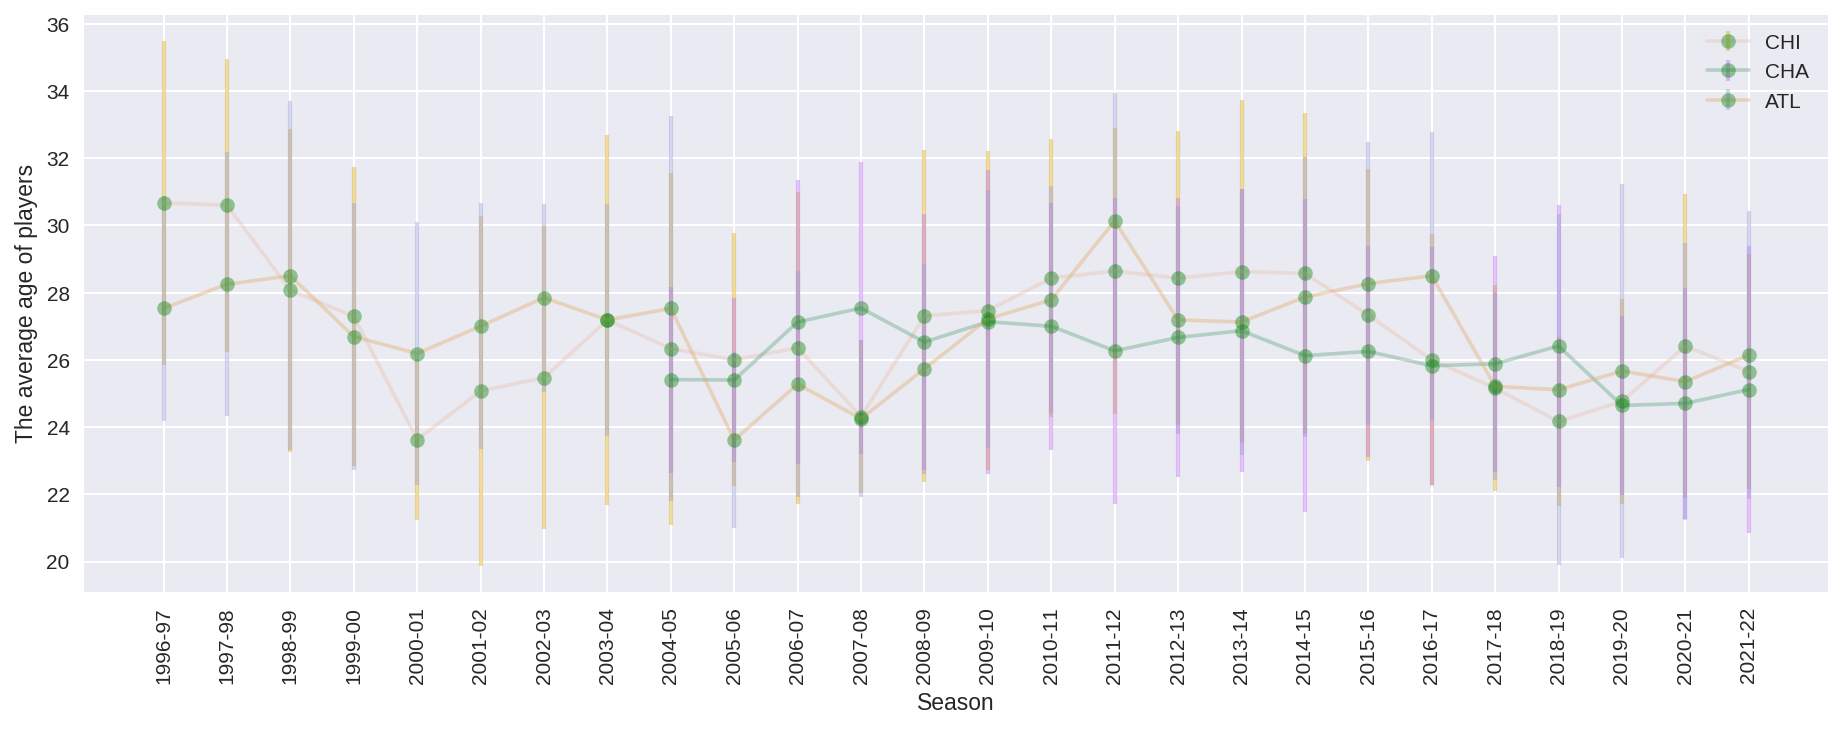

In [ ]:
# Plot line graphs (with error bars) for many teams
# BUT result graph looks confusing as error bars are overlapping with one another

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot with random colors
for team in ['CHI', 'CHA', 'ATL']:
  plt.errorbar(x=df_mean.index, y=df_mean[team],
                yerr=df_sd[team],
                label=team,               # Label to be used in the legend
                linestyle='solid',        # Format line and marker styles
                color=np.random.rand(3,), # Format line and marker styles
                marker='o',               # Format line and marker styles
                markerfacecolor='green',  # Format line and marker styles
                ecolor=np.random.rand(3,), elinewidth=2, capsize=0, # Format the error bars
                alpha=0.4
            )

plt.legend()   # Add legend to the graph
plt.xlabel("Season")                     # Add x-labels
plt.ylabel("The average age of players") # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

Bar graph with error bars:

In [ ]:
# Plot a VERTICAL bar graph (with error bars) for one team

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
team = 'CHI'
plt.bar( x=df_mean.index, height=df_mean[team],
         yerr=df_sd[team],
         label=team,       # Label to be used in the legend
         alpha=0.4
      )

plt.legend()   # Add legend to the graph
plt.xlabel("Season")                     # Add x-labels
plt.ylabel("The average age of players") # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

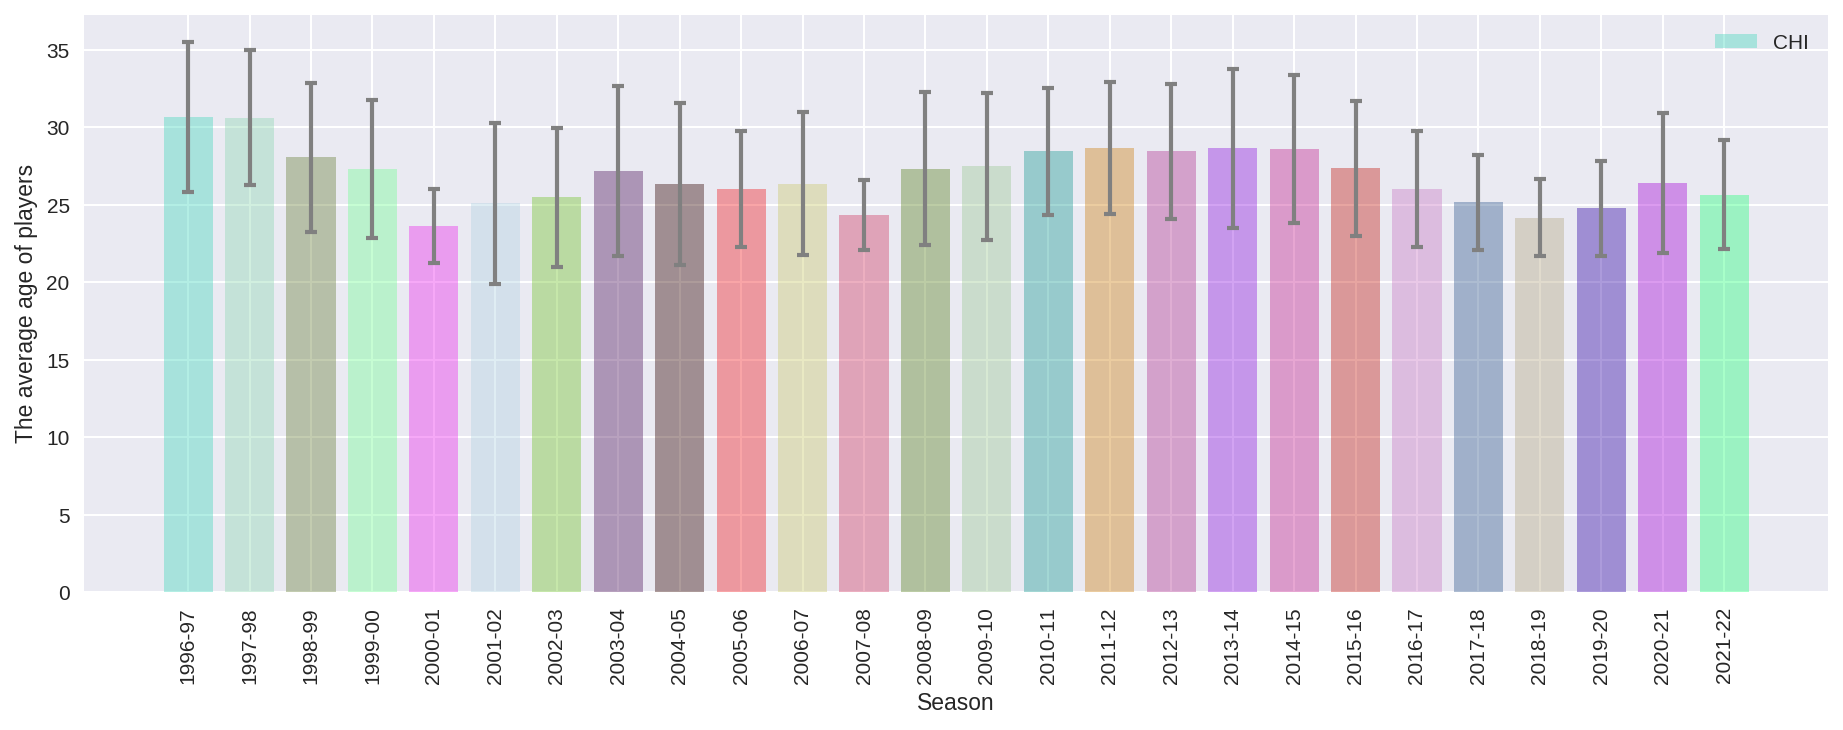

In [ ]:
# Plot a VERTICAL bar graph (with error bars) for one team
# Plus, additional color styling for bars and error bars

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
team = 'CHI'
plt.bar( x=df_mean.index, height=df_mean[team],
         yerr=df_sd[team],
         label=team,                                # Label to be used in the legend
         color=np.random.rand(df_mean.shape[0],3),  # Assign a random RGB color to each bar separately
         error_kw=dict(ecolor='gray', lw=2, capsize=3, capthick=2),  # Style of the error bars
         alpha=0.4
      )

plt.legend()   # Add legend to the graph
plt.xlabel("Season")                     # Add x-labels
plt.ylabel("The average age of players") # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

In [ ]:
# Plot VERTICAL stacked bar graphs (with error bars) for many teams

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
bottoms = pd.Series( [0] * df_mean.shape[0] )
bottoms = 0     # Each bar plot of the first team has the bottom of bar at y=0
for team in ['CHI', 'CHA', 'ATL']:
  plt.bar( x=df_mean.index, height=df_mean[team],
            yerr=df_sd[team],
            label=team,           # Label to be used in the legend
            error_kw=dict(ecolor='gray', lw=2, capsize=3, capthick=2),  # Style of the error bars
            bottom=bottoms        # The y coordinates of the bars bases (default:0)
      )
  bottoms += df_mean[team].fillna(0)

plt.legend()   # Add legend to the graph
plt.xlabel("Season")                     # Add x-labels
plt.ylabel("The average age of players") # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

## 5.2 Pandas' .plot()

Line graphs with error bars:

In [ ]:
# Easily plot line graphs (with error bars) of more than one teams
# Result graph looks confusing as error bars are overlapping with one another

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Choose some teams
teams = ['CHI', 'CHA', 'ATL']

# Plot: Alternative 1
params = {'linestyle':'solid', 'marker':'o', 'elinewidth':2, 'capsize':0}
df_mean.loc[ :, teams].plot( kind='line',
                             yerr=df_sd[teams],    # Set values for y-axis error bars
                             ** params,
                             alpha=0.6,
                             ax=ax
                         )

# Plot: Alternative 2
#df_mean.loc[ :, teams ].plot.line(yerr=df_sd[teams], **params, alpha=0.6, ax=ax)

plt.ylabel("The average age of players") # Add y-labels

Text(0, 0.5, 'The average age of players')

Bar graphs with error bars:

In [ ]:
# Easily plot VERTICAL bar graphs (with error bars) of more than one teams
# Result graph looks confusing as error bars are overlapping with one another

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Choose some teams
teams = ['CHI', 'CHA', 'ATL']

# Plot: Alternative 1
error_kw = dict(ecolor='gray', lw=1, capsize=2, capthick=1)
df_mean.loc[ :, teams].plot(kind='bar',
                            yerr=df_sd[teams],  # Set values for y-axis error bars
                            error_kw=error_kw,  # Style of the error bars
                            ax=ax
                      )

# Plot: Alternative 2
#df_mean.loc[ :, teams ].plot.bar(yerr=df_sd[teams], error_kw=error_kw, ax=ax)

plt.legend(loc='best', ncol=3)       # Set parameters of the legend
plt.ylabel("Average age of players") # Add label to y-axis

Text(0, 0.5, 'Average age of players')

Text(0, 0.5, 'Average age of players')

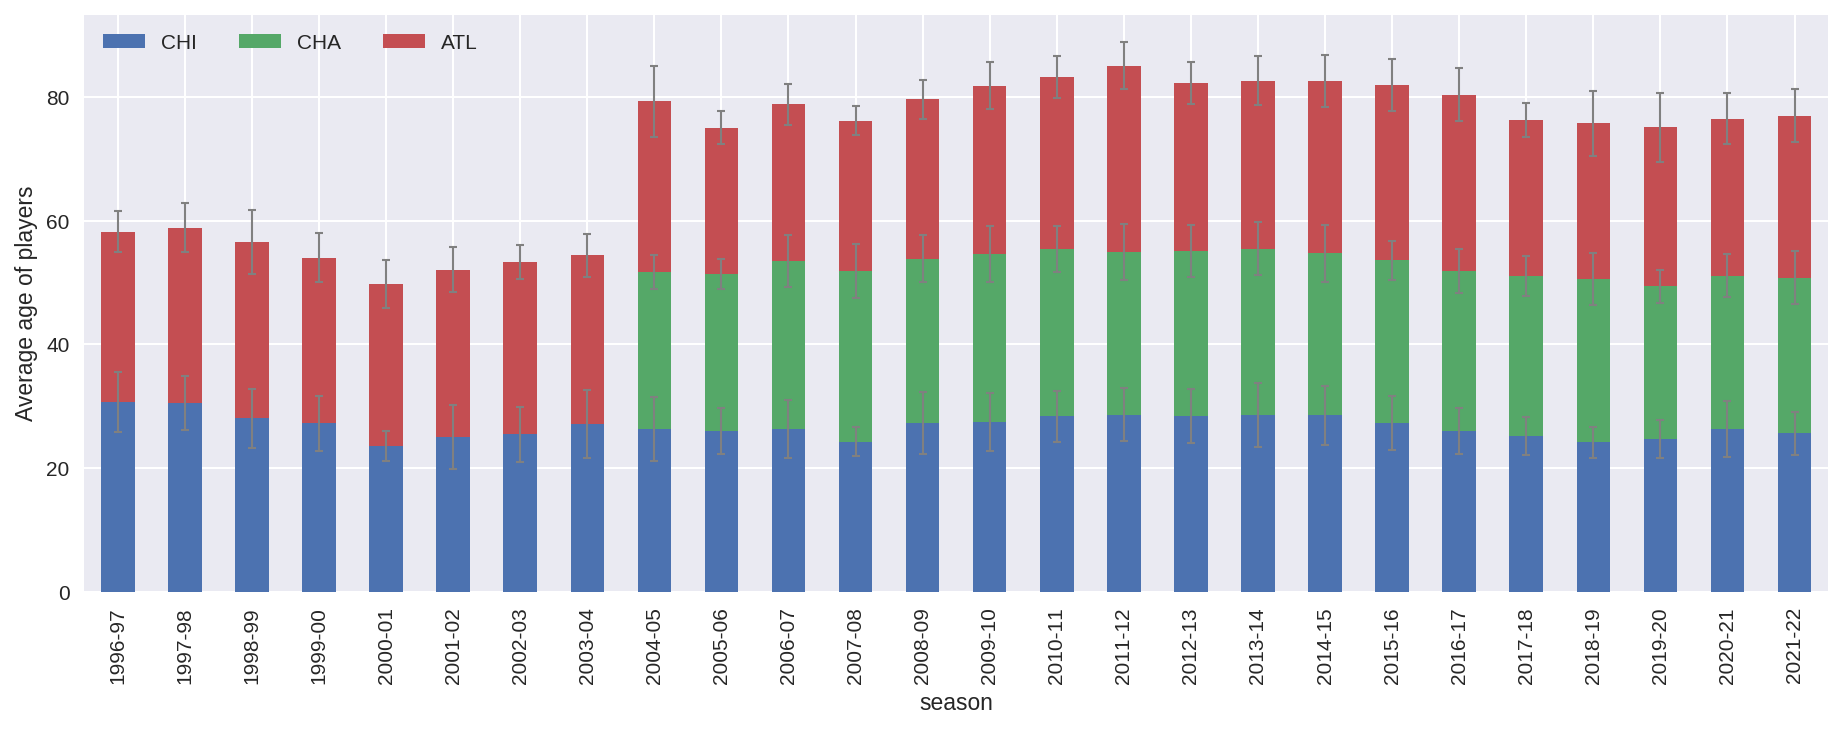

In [ ]:
# Easily plot VERTICAL stacked bar graphs (with error bars) of more than one teams
# Result graph looks confusing as error bars are overlapping with one another

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Choose some teams
teams = ['CHI', 'CHA', 'ATL']

# Plot: Alternative 1
error_kw = dict(ecolor='gray', lw=1, capsize=2, capthick=1)
df_mean.loc[ :, teams].plot(kind='bar',
                            stacked=True,
                            yerr=df_sd[teams],  # Set values for y-axis error bars
                            error_kw=error_kw,  # Style of the error bars
                            ax=ax
                      )

# Plot: Alternative 2
#df_mean.loc[ :, teams ].plot.bar(stacked=True, yerr=df_sd[teams], error_kw=error_kw, ax=ax)

plt.legend(loc='upper left', ncol=3) # Set the legend's location and number of columns
plt.ylabel("Average age of players") # Add label to y-axis

# 6. Pie plot

- Use a horizontal/vertical bar chart if you want to see the difference between your categories.
- But if you’re interested in ratios, pie plots are an excellent tool.

In [ ]:
# Prepare data: The number of pokemons in each type (Type1)
df = df_pokemon.groupby(by='type1')[['name']].count()
df.rename(columns={'name':'poke_count'}, inplace=True)   # Rename the column from 'name' to 'poke_count'

df.sort_values(by='poke_count', ascending=False)

poke_count
type1               
water            114
normal           105
grass             78
bug               72
psychic           53
fire              52
rock              45
electric          39
ground            32
poison            32
dark              29
fighting          28
ghost             27
dragon            27
steel             24
ice               23
fairy             18
flying             3

(-1.25, 2.75)

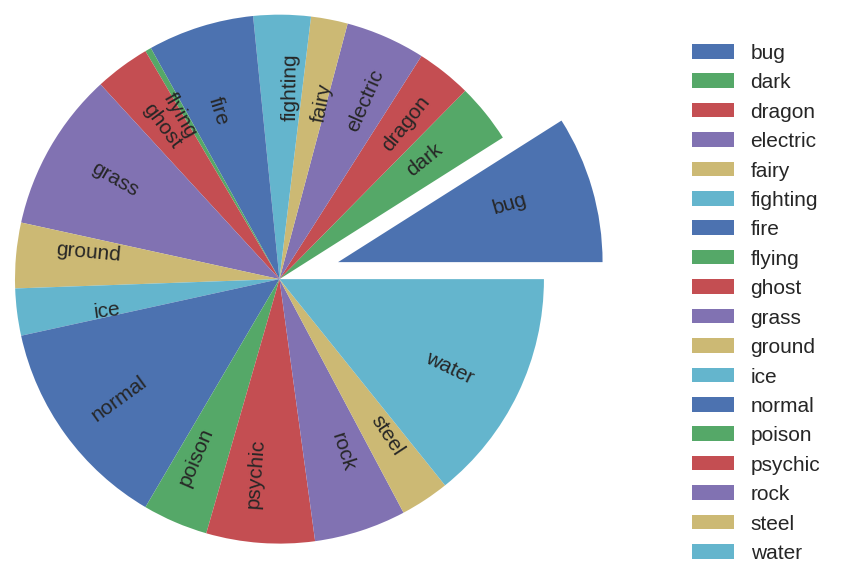

In [ ]:
# Matplotlib: Plot a pie chart

# (Optional) Figure setting
plt.figure(figsize=(7,7),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
explode_val = pd.Series( [0.0] * df.shape[0] )
explode_val[:] = 0    # Set initial explode values of all wedges as 0
explode_val[0] = 0.3  # Set the explode value of the first wedge as 0.2
_ = plt.pie( x=df['poke_count'],   # The wedges size (1D array)
             labels=df.index,      # Labels of each wedge
             radius=1.3,           # Radius of the pie (default:1)
             explode=explode_val,  # How far from the center each wedge is displayed (default:0)
             labeldistance=0.6,    # The radius distance at which labels are drawn(default:1.1)
             rotatelabels=True     # Rotate each label according to its corresponding wedge
          )

plt.legend()    # Add legend to the graph

# Lengthen the x-axis so that the legend doesn't overlap with data
left, right = ax.get_xlim()    # Get the current left and right limits
ax.set_xlim(left, right+1.5)   # Set xlim to the new values

(-1.25, 2.75)

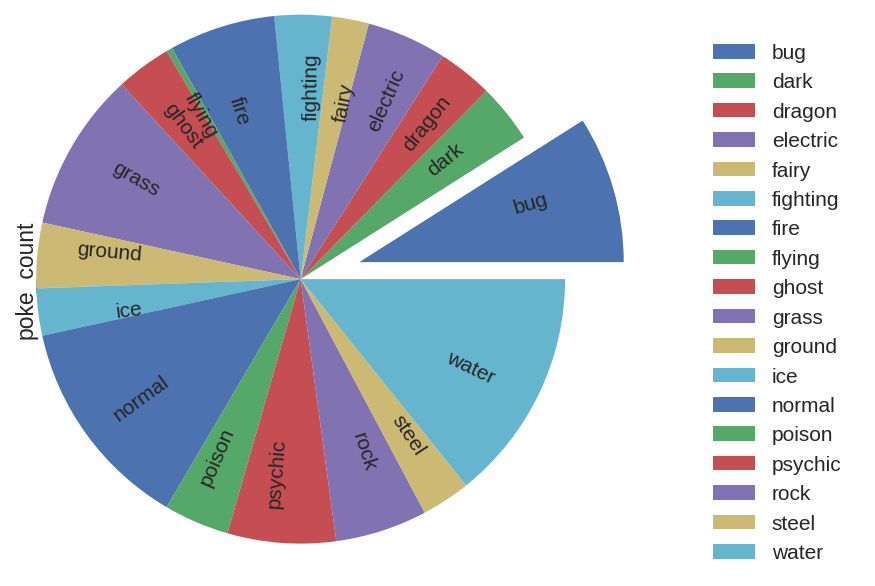

In [ ]:
# Pandas: Plot a pie chart

# (Optional) Figure setting
plt.figure(figsize=(7,7),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
explode_val = pd.Series( [0.0] * df.shape[0] )
explode_val[:] = 0    # Set initial explode values of all wedges as 0
explode_val[0] = 0.3  # Set the explode value of the first wedge as 0.2
df.plot( kind='pie',
             y='poke_count',       # The column that specifies wedges size (1D array)
             labels=df.index,      # Labels of each wedge
             radius=1.3,           # Radius of the pie (default:1)
             explode=explode_val,  # How far from the center each wedge is displayed (default:0)
             labeldistance=0.6,    # The radius distance at which labels are drawn(default:1.1)
             rotatelabels=True,    # Rotate each label according to its corresponding wedge
             ax=ax
          )

# Lengthen the x-axis so that the legend doesn't overlap with data
left, right = ax.get_xlim()    # Get the current left and right limits
ax.set_xlim(left, right+1.5)   # Set xlim to the new values

# 7. Area plot

> Below explanation and figures from https://www.tibco.com/reference-center/what-is-an-area-chart


- **Definition:**
  - An area chart is a graph that <u>combines a line chart and a bar chart to show changes in quantities over time</u>.
  - An area chart is similar to a line graph in that data points are plotted and connected by line segments. However, the area below the line is colored in or shaded.


- **Types of area chart:** Overlapping vs. Stacked area charts (the latter is most commonly referred to as an area chart)

<div align=center><img src="https://wac-cdn.atlassian.com/dam/jcr:09352cf1-c353-4ac2-9052-cc4c03b3e4f1/area-chart-example-2.png?cdnVersion=2247" alt="Overlapping area chart" width=300/></div>

<div align=center><img src="https://wac-cdn.atlassian.com/dam/jcr:44a4d7f2-2003-4ea8-b16f-99750776a132/area-chart-example-3.png?cdnVersion=2247" alt="Stacking area chart" width=300/></div>

- **When to use an area chart?**
  - There is data expressed <u>as a total</u>.
  - There are time periods to compare.
  - The point of the chart is to communicate an overall trend, not individual values.
  - There are multiple data series with part-to-whole relationships, or a cumulative series of values.

- **When NOT to use an area chart?**
  - When showing how values differ across a range of different categories, an area chart is not ideal. Instead, consider using a bar chart, column chart, or split bar chart.
  - When the data total is not important, an area chart could be misleading and not provide the full information. A line chart will likely be easier to read and understand.
  - When the differences between values are small, a line chart is preferable. This is because its Y-axis doesn’t have to start at zero and can be stretched to show even tiny differences.
  - When the chart is only showing one value over time, or there are only a few dates to plot, a line chart or column chart is better, and labelling is superior. When there are ten or fewer dates, a stacked column chart is easier to read.
  - When comparing the size of different shares, a line chart is a better way of presenting the information.


In [ ]:
# Prepare data: The number of NBA players in each team for each season
df = df_nba.pivot_table(index='season', columns='team_abbreviation', values='player_name', aggfunc='count')
df

team_abbreviation   ATL   BKN   BOS   CHA   CHH   CHI   CLE   DAL   DEN   DET  \
season                                                                          
1996-97            17.0   NaN  17.0   NaN  13.0  15.0  13.0  17.0  17.0  14.0   
1997-98            16.0   NaN  14.0   NaN  15.0  15.0  16.0  16.0  15.0  14.0   
1998-99            14.0   NaN  15.0   NaN  15.0  15.0  16.0  14.0  16.0  17.0   
1999-00            13.0   NaN  14.0   NaN  17.0  17.0  18.0  17.0  15.0  14.0   
2000-01            16.0   NaN  15.0   NaN  15.0  16.0  18.0  15.0  15.0  14.0   
2001-02            18.0   NaN  14.0   NaN  14.0  13.0  15.0  17.0  17.0  15.0   
2002-03            20.0   NaN  15.0   NaN   NaN  15.0  12.0  16.0  16.0  15.0   
2003-04            16.0   NaN  14.0   NaN   NaN  16.0  15.0  13.0  15.0  13.0   
2004-05            17.0   NaN  12.0  17.0   NaN  15.0  16.0  14.0  15.0  15.0   
2005-06            13.0   NaN  14.0  15.0   NaN  17.0  15.0  16.0  17.0  15.0   
2006-07            18.0   NaN  16.0  16.0   NaN  14.0  15.0  15.0  14.0  15.0   
2007-08            12.0   NaN  15.0  13.0   NaN  16.0  16.0  15.0  15.0  15.0   
2008-09            15.0   NaN  15.0  17.0   NaN  13.0  16.0  15.0  13.0  13.0   
2009-10            14.0   NaN  15.0  15.0   NaN  15.0  15.0  13.0  13.0  14.0   
2010-11            14.0   NaN  16.0  16.0   NaN  14.0  16.0  15.0  14.0  13.0   
2011-12            15.0   NaN  17.0  15.0   NaN  14.0  16.0  15.0  15.0  14.0   
2012-13            16.0  17.0  17.0  18.0   NaN  14.0  16.0  21.0  15.0  14.0   
2013-14            16.0  17.0  16.0  15.0   NaN  16.0  18.0  15.0  14.0  15.0   
2014-15            15.0  16.0  14.0  16.0   NaN  14.0  17.0  16.0  18.0  15.0   
2015-16            15.0  17.0  15.0  16.0   NaN  15.0  17.0  15.0  16.0  15.0   
2016-17            18.0  18.0  15.0  17.0   NaN  16.0  19.0  19.0  17.0  15.0   
2017-18            19.0  18.0  19.0  17.0   NaN  19.0  16.0  21.0  17.0  18.0   
2018-19            18.0  17.0  16.0  17.0   NaN  18.0  21.0  16.0  18.0  17.0   
2019-20            18.0  22.0  17.0  14.0   NaN  17.0  18.0  18.0  17.0  19.0   
2020-21            17.0  21.0  18.0  17.0   NaN  17.0  21.0  17.0  18.0  17.0   
2021-22            21.0  17.0  22.0  17.0   NaN  20.0  22.0  21.0  20.0  25.0   

team_abbreviation  ...   PHI   PHX   POR   SAC   SAS   SEA   TOR   UTA   VAN  \
season             ...                                                         
1996-97            ...  15.0  16.0  16.0  14.0  16.0  16.0  20.0  12.0  15.0   
1997-98            ...  16.0  13.0  17.0  15.0  14.0  15.0  19.0  13.0  13.0   
1998-99            ...  16.0  17.0  15.0  14.0  14.0  16.0  15.0  14.0  15.0   
1999-00            ...  15.0  17.0  14.0  14.0  14.0  15.0  15.0  12.0  15.0   
2000-01            ...  16.0  13.0  16.0  14.0  15.0  14.0  15.0  14.0  14.0   
2001-02            ...  19.0  15.0  15.0  13.0  15.0  16.0  16.0  14.0   NaN   
2002-03            ...  14.0  14.0  15.0  14.0  13.0  14.0  18.0  13.0   NaN   
2003-04            ...  14.0  12.0  19.0  13.0  17.0  14.0  16.0  17.0   NaN   
2004-05            ...  14.0  14.0  16.0  15.0  16.0  15.0  14.0  16.0   NaN   
2005-06            ...  16.0  16.0  14.0  14.0  15.0  14.0  15.0  15.0   NaN   
2006-07            ...  16.0  14.0  16.0  14.0  15.0  16.0  16.0  14.0   NaN   
2007-08            ...  13.0  13.0  13.0  17.0  17.0  17.0  16.0  14.0   NaN   
2008-09            ...  13.0  14.0  14.0  14.0  19.0   NaN  16.0  15.0   NaN   
2009-10            ...  14.0  14.0  15.0  16.0  14.0   NaN  15.0  13.0   NaN   
2010-11            ...  15.0  14.0  16.0  15.0  16.0   NaN  17.0  16.0   NaN   
2011-12            ...  16.0  13.0  14.0  14.0  19.0   NaN  17.0  15.0   NaN   
2012-13            ...  15.0  15.0  15.0  14.0  15.0   NaN  15.0  14.0   NaN   
2013-14            ...  18.0  15.0  15.0  16.0  15.0   NaN  15.0  17.0   NaN   
2014-15            ...  20.0  17.0  16.0  17.0  15.0   NaN  16.0  16.0   NaN   
2015-16            ...  14.0  16.0  16.0  15.0  18.

## 7.1 Matplotlib's pyplot

In [ ]:
# Matplotlib: Plot an area chart regarding one team

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot:
### 1. Use fill_between() (draw the area in the back)
### 2. Draw line plots (draw the line on the front)
team = 'CHI'
plt.fill_between( x=df.index,
                  y1=df.loc[:,team],  # y coordinates of the first curve
                  y2=0,               # y coordinates of the second curve (default:0)
                  color='skyblue',
                  alpha=0.4
                )
plt.plot( df.index, df.loc[:,team],                  # x and y to plot
          color='slateblue', alpha=0.6, linewidth=2  # Matplotlib line and markers style
        )

plt.xlabel("Season")                  # Add x-labels
plt.ylabel("The number of players")   # Add y-labels

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

In [ ]:
# Monitor NA values in the three teams that we will focus in the next cell
teams = ['CHI', 'CHA', 'ATL']

# How many NA values each team has
df.loc[:, teams].isna().sum()

team_abbreviation
CHI    0
CHA    8
ATL    0
dtype: int64

In [ ]:
# Monitor NA values in the three teams that we will focus in the next cell
teams = ['CHI', 'CHA', 'ATL']

# How many NA values each season has
df.loc[:, teams].isna().sum(axis=1)

season
1996-97    1
1997-98    1
1998-99    1
1999-00    1
2000-01    1
2001-02    1
2002-03    1
2003-04    1
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
2017-18    0
2018-19    0
2019-20    0
2020-21    0
2021-22    0
dtype: int64

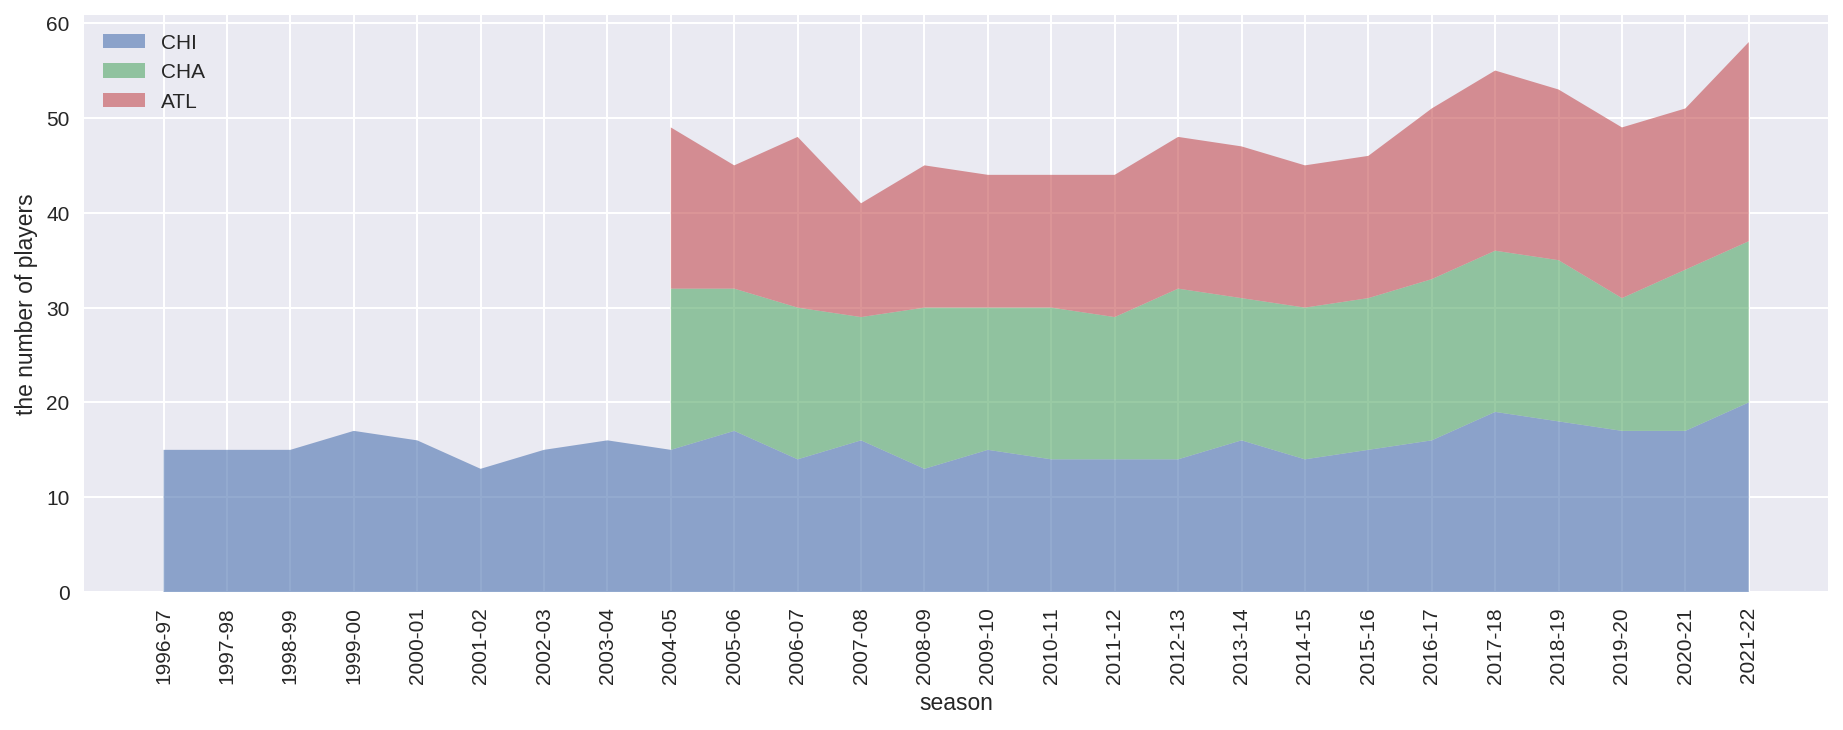

In [ ]:
# Matplotlib: Plot a stacked area charts regarding many teams
# BUT the NA values in the first 8 seasons of the 'CHA' team affect any following sequences (i.e., 'ATL')

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
plt.stackplot( df.index,            # x (1D array of N*1 dimension)
               df.loc[:,teams].T,   # y (2D array of M*N dimension)
               baseline='zero',     # {'zero', 'sym', 'wiggle', 'weighted_wiggle'}
               labels=teams,        # Label to be used in the legend
               alpha=0.6
            )

plt.legend(loc='upper left')    # Add legend to the graph
plt.xlabel('season')                # Add label to x-axis
plt.ylabel('the number of players') # Add label to y-axis

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

## 7.2 Pandas's .plot()

In [ ]:
# Pandas: Easily plot a stacked area charts regarding many teams at once
# Pandas automatically handles NA values in the CHA team for us

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
# Default:stacked=False, x=None (use row index), y=None (use all columns)
teams = ['CHI', 'CHA', 'ATL']
df.loc[:, teams].plot( kind='area', stacked=True, alpha=0.6, ax=ax )

plt.legend(loc='upper left')        # Set parameters of the legend
plt.ylabel('the number of players') # Add label to y-axis

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

# 8. Box plot (a.k.a., Box and whisker plot)

> Below explanation and figures from https://chartio.com/learn/charts/box-plot-complete-guide/ and https://www.simplypsychology.org/boxplots.html#:~:text=When%20reviewing%20a%20box%20plot,whiskers%20of%20the%20box%20plot.&text=For%20example%2C%20outside%201.5%20times,Q3%20%2B%201.5%20*%20IQR

A box plot uses boxes and lines to depict <u>the distributions of one or more groups of numeric data</u>. It provides a cleaner representation of the general trend of the data, compared to the equivalent line chart.

**Components:**

- Box limits indicate the range of the central 50% of the data (data in Q2 and Q3), with a central line marking the median value.
- Lines extend from each box to capture the range of the remaining data.
- Dots placed past the line edges indicate outliers. Using the IQR (interquartile range) method, ourliers are the values larger than `Q3 + (1.5 * IQR)` or the values smaller than `Q1 – (1.5 * IQR)`, when `IQR = Q3 - Q1`.

<div align=center><img src="https://chartio.com/assets/79165a/tutorials/charts/box-plots/e30a92b3850d486bef6d0752caaa3d110944b25c9ef3043d821a4998c32bb526/box-plot-construction.png" alt="Components of a box plot" width=450></div>

<div align=center><img src="https://chartio.com/assets/3c858b/tutorials/charts/box-plots/5774391efba71e3b139d9210b3792fdade9d221dc2ba015158911e439a15dc63/box-plot-example.png" alt="An example of a box plot"></div>

**When to use a box plot:**
- Compare the medians of box plots
- Compare the interquartile ranges and whiskers of box plots: Compare the interquartile ranges (that is, the box lengths), to examine how the data is dispersed between each sample. <u>The longer the box the more dispersed the data. The smaller the less dispersed the data</u>.
- Look for potential outliers (a data point that is located outside the whiskers of the box plot)
- Look for signs of skewness
  - When a data distribution is symmetric, you can expect the median to be in the exact center of the box. Outliers should be evenly present on either side of the box.
  - If a distribution is skewed, then the median will not be in the middle of the box. You may also find an imbalance in the whisker lengths, where one side is short with no outliers, and the other has a long tail with many more outliers.





## 8.1 Matplotlib's pyplot

In [ ]:
# Inspect NA values in each column of the dataframe
df_air.isna().sum()

datetime             0
station_antwerp    940
station_paris       31
station_london      66
dtype: int64

In [ ]:
# In matplotlib, a box plot will be drawn only for the column containing no NA value.

# Plot (ValueError)
# In this example, all three columns regarding the three stations) contain NA values
_ = plt.boxplot( df_air.iloc[:,1:].T,       # A 2D array
                 labels=df_air.columns[1:],
          )

ValueError: Dimensions of labels and X must be compatible

In [ ]:
# Box plot where any row containing at least one NA value are removed

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
dict_result = plt.boxplot( df_air.iloc[:,1:].dropna(),  # A 2D array
                           labels=df_air.columns[1:],
                         )

plt.xlabel('station')     # Add label to x-axis
plt.ylabel('air quality') # Add label to y-axis

Text(0, 0.5, 'air quality')

Text(0, 0.5, 'air quality')

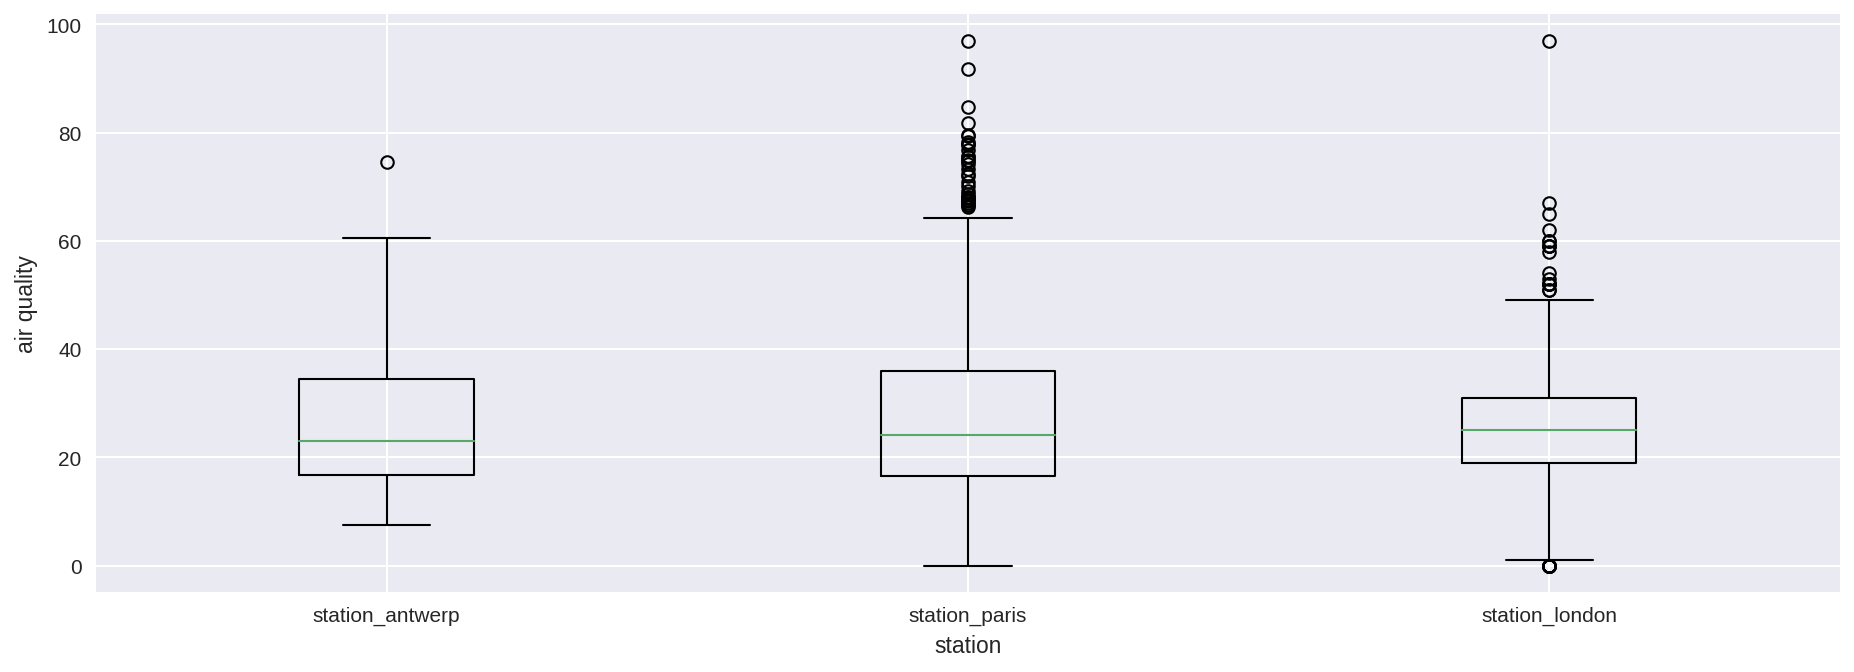

In [ ]:
# Box plot where NA values are removed from each column separately

# Create a filtered data
df_filtered = []
for name in df_air.columns[1:]:
  df_filtered.append( df_air[name].dropna() )

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
dict_result = plt.boxplot( df_filtered,  # A sequence of 1D arrays
                           labels=df_air.columns[1:],
                         )

plt.xlabel('station')     # Add label to x-axis
plt.ylabel('air quality') # Add label to y-axis

## 8.2 Pandas's .plot()

Pandas automatically skips non-numerical columns (if any) and ignores NA values in each column.

Text(0, 0.5, 'air quality')

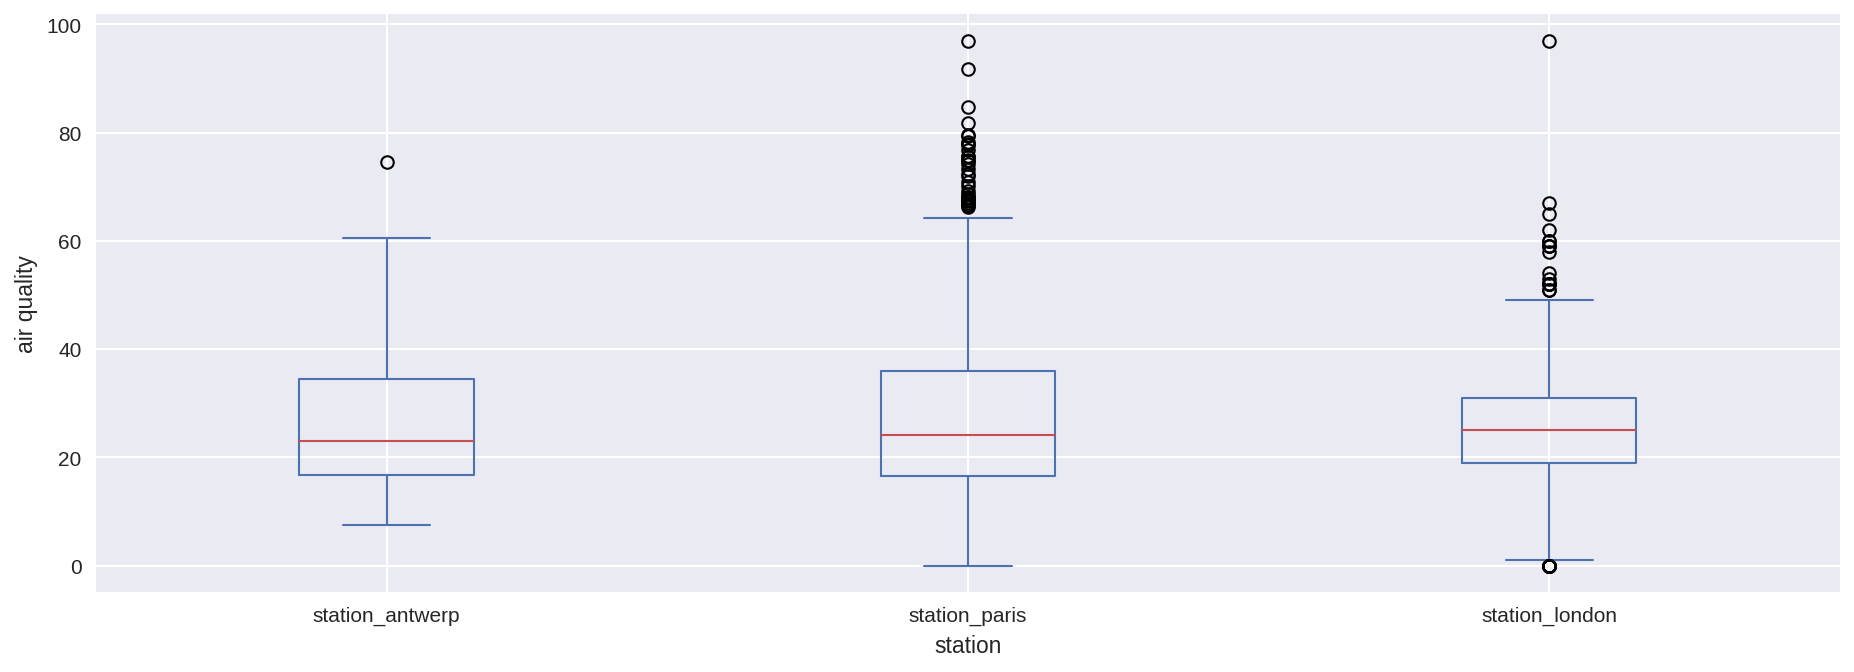

In [ ]:
# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
_ = df_air.plot(kind='box', ax=ax)

ax.set_xlabel('station')     # Add label to x-axis
ax.set_ylabel('air quality') # Add label to y-axis

# 9. Histogram

**Overview:**
- Out of all probability distribution functions, probability density function (pdf) best shows how the whole 100% probability mass is distributed over the x-axis.
- The oldest pdf empirical representation is a histogram.
- Use a histogram to <u>check data distribution and detect outliers</u>

**Histogram vs. Bar plot:**
- In a histogram, the bars are adjacent to each other (no space between the consecutive bars).
- A bar plot helps us compare the values of different categorical variables whereas <u>a histogram helps us to understand the frequency of <b>numerical data</b></u>.
- <u>A histogram is used for distribution of non-discrete (= continuous) variables</u> whereas a bar plot is used for comparison of discrete variables.
- <u>In a histogram, the bars cannot be rearranged</u> whereas, in a bar plot, it is common to rearrange the bars from highest to lowest.



## 9.1 1D Histogram

### 9.1.1 Matplotlib's pyplot

Plot a 1D histogram on a series of NUMERIC data:

In [ ]:
# Inspect the series to be plotted
print( "===== df_pokemon['weight_kg'] =====" )
print( f"\nmin={df_pokemon['weight_kg'].min()} , max={df_pokemon['weight_kg'].max()}\n" )
df_pokemon['weight_kg'].value_counts()

===== df_pokemon['weight_kg'] =====

min=0.1 , max=999.9



weight_kg
15.0     9
5.0      8
8.5      8
28.0     8
2.0      7
        ..
24.9     1
235.0    1
88.4     1
44.5     1
888.0    1
Name: count, Length: 421, dtype: int64

In [ ]:
# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
# Default: bins=10, histtype='bar', cumulative=False, align='mid', orientation='vertical', stacked=False
n, bins, patches = plt.hist( x=df_pokemon['weight_kg'],  # Numeric data to plot
                             bins=50,       # default=10
                             alpha=0.6,
                          )
plt.xlabel('weight (kg)')            # Add label to x-axis
plt.ylabel('the number of pokemons') # Add label to y-axis

# Inspect the returned values
for key,val in {'n':n, 'bins':bins, 'patches':patches}.items():
  print( f'{key}:' )
  print( f'|-- type = {type(val)}' )
  if hasattr(val, 'shape'):
    print( f'|-- shape = {val.shape}' )
  print( f'|-- value = {val}\n' )

n:
|-- type = <class 'numpy.ndarray'>
|-- shape = (50,)
|-- value = [327. 163.  83.  43.  46.  22.  16.  10.   6.   8.  15.   5.   7.   1.
   4.   2.   6.   3.   0.   2.   1.   1.   1.   0.   0.   1.   0.   1.
   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   1.   0.   1.   1.   0.   2.]

bins:
|-- type = <class 'numpy.ndarray'>
|-- shape = (51,)
|-- value = [1.00000e-01 2.00960e+01 4.00920e+01 6.00880e+01 8.00840e+01 1.00080e+02
 1.20076e+02 1.40072e+02 1.60068e+02 1.80064e+02 2.00060e+02 2.20056e+02
 2.40052e+02 2.60048e+02 2.80044e+02 3.00040e+02 3.20036e+02 3.40032e+02
 3.60028e+02 3.80024e+02 4.00020e+02 4.20016e+02 4.40012e+02 4.60008e+02
 4.80004e+02 5.00000e+02 5.19996e+02 5.39992e+02 5.59988e+02 5.79984e+02
 5.99980e+02 6.19976e+02 6.39972e+02 6.59968e+02 6.79964e+02 6.99960e+02
 7.19956e+02 7.39952e+02 7.59948e+02 7.79944e+02 7.99940e+02 8.19936e+02
 8.39932e+02 8.59928e+02 8.79924e+02 8.99920e+02 9.19916e+02 9.39912e+02
 9.59908e+02 9.79904e

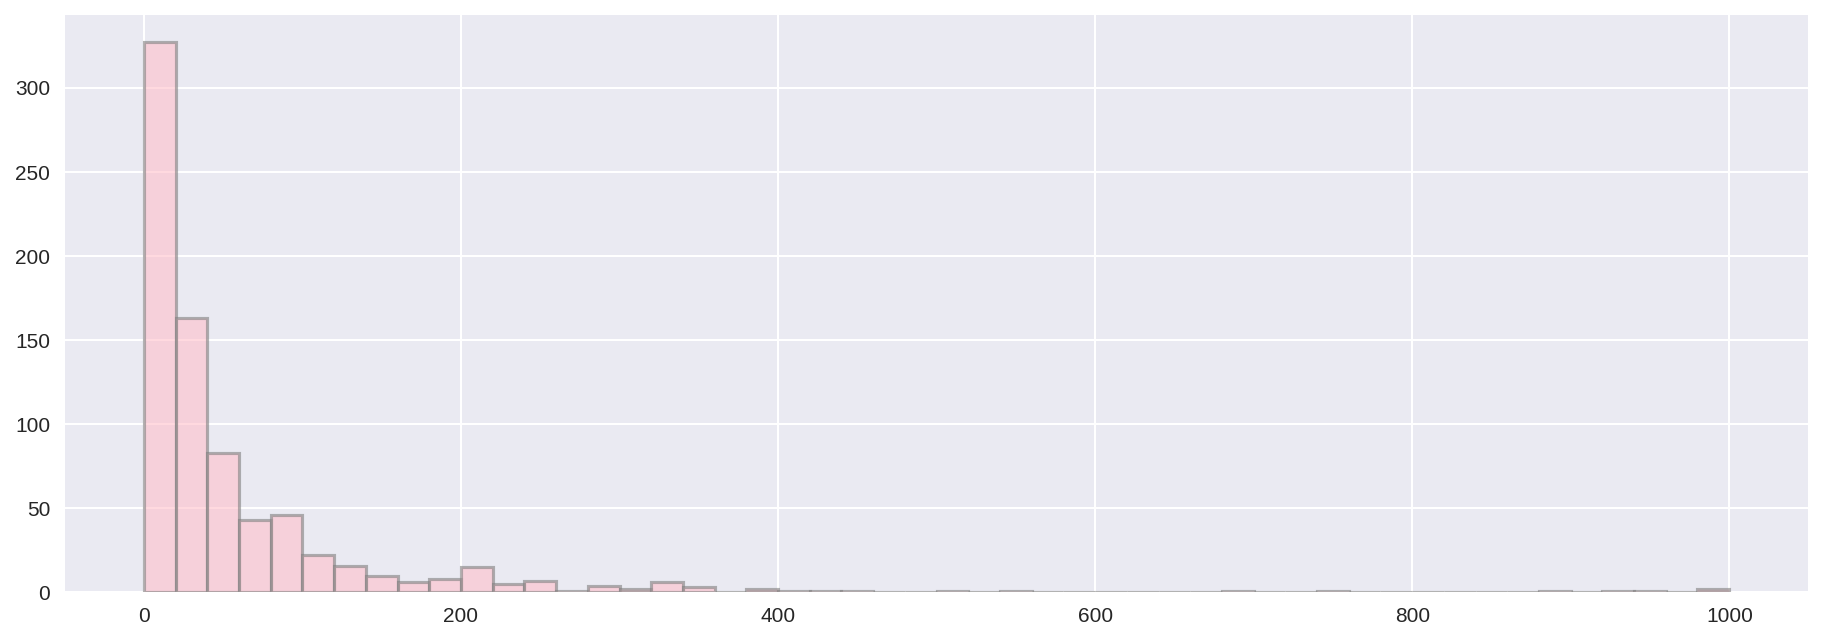

In [ ]:
# Style the histogram from the above cell
plt.figure(figsize=(15,5),dpi=150)
n, bins, patches = plt.hist( x=df_pokemon['weight_kg'],  # Numeric data to plot
                             bins=50,       # default=10
                             alpha=0.6,
                             facecolor='pink', edgecolor='gray', linewidth=1.5, # Style the histogram
                        )

Plot a 1D histogram on a series of NON-NUMERIC data:
- Can this be done?
- How to bin the non-numeric data?

n:
|-- type = <class 'numpy.ndarray'>
|-- shape = (20,)
|-- value = [ 78.  52. 114.  72. 105.  32.   0.  39.  32.  18.  28.  53.  45.   0.
  27.  23.  27.  29.  24.   3.]

bins:
|-- type = <class 'numpy.ndarray'>
|-- shape = (21,)
|-- value = [ 0.    0.85  1.7   2.55  3.4   4.25  5.1   5.95  6.8   7.65  8.5   9.35
 10.2  11.05 11.9  12.75 13.6  14.45 15.3  16.15 17.  ]

patches:
|-- type = <class 'matplotlib.container.BarContainer'>
|-- value = <BarContainer object of 20 artists>



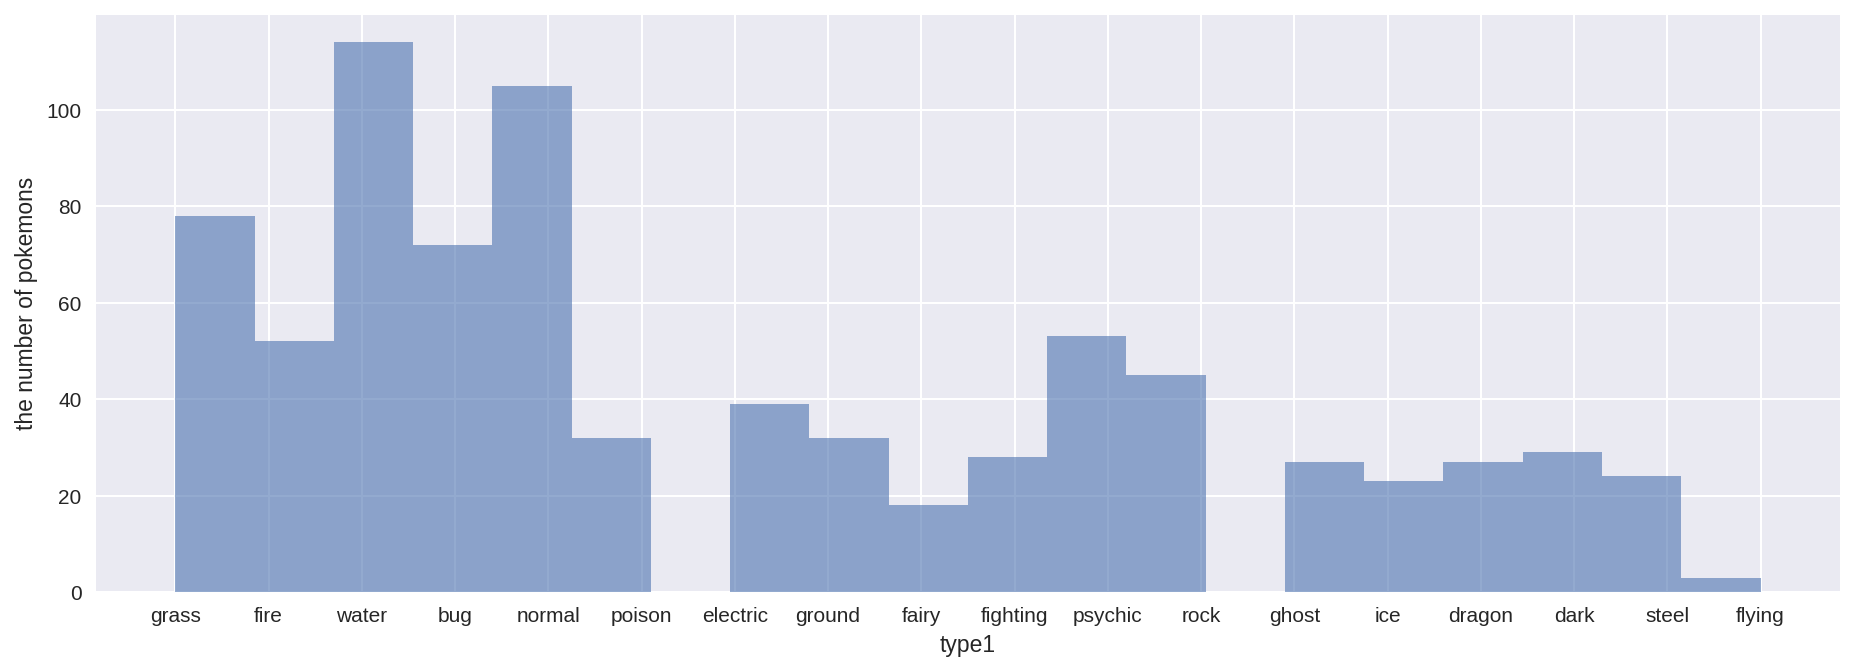

In [ ]:
# No error in the plotting command BUT the resultant bins seem weird

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Plot
n, bins, patches = plt.hist( x=df_pokemon['type1'],    # Non-numeric data to plot
                             bins=20,                  # default:10
                             alpha=0.6,
                        )
plt.xlabel('type1')                  # Add label to x-axis
plt.ylabel('the number of pokemons') # Add label to y-axis

# Inspect the returned values
for key,val in {'n':n, 'bins':bins, 'patches':patches}.items():
  print( f'{key}:' )
  print( f'|-- type = {type(val)}' )
  if hasattr(val, 'shape'):
    print( f'|-- shape = {val.shape}' )
  print( f'|-- value = {val}\n' )

Text(0, 0.5, 'the number of pokemons')

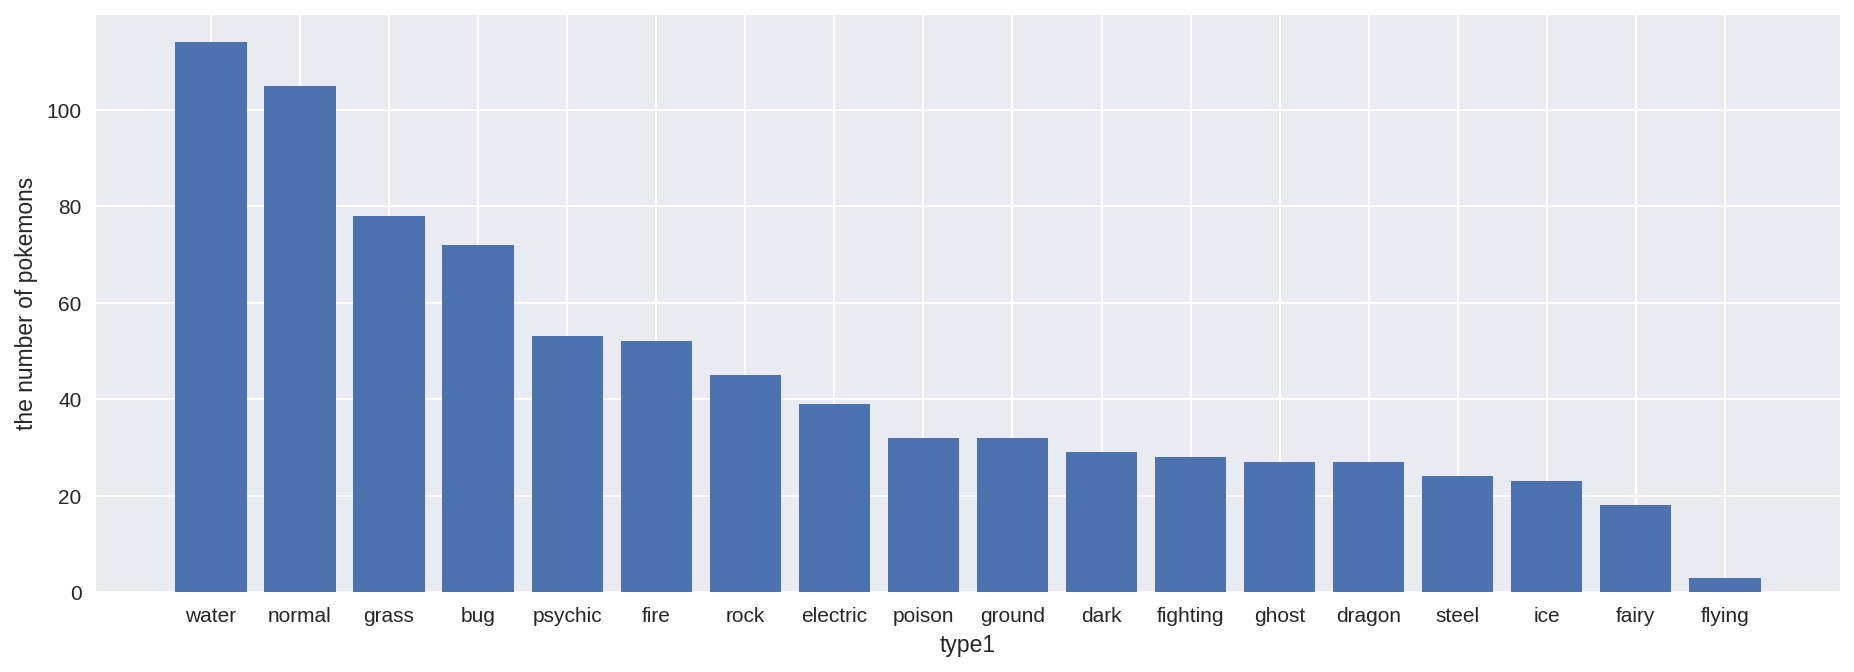

In [ ]:
# To display frequencies of non-numeric (categorical) data, use the bar plot not the histogram

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Prepare data
df = df_pokemon['type1'].value_counts()

# Plot
plt.bar( x=df.index, height=df )
plt.xlabel('type1')                  # Add label to x-axis
plt.ylabel('the number of pokemons') # Add label to y-axis

Plot a 1D histogram on a dataframe (with more than 1 series) of NUMERIC data:



n:
|-- type = <class 'numpy.ndarray'>
|-- shape = (2, 10)
|-- value = [[ 97. 175. 384. 234.  55.  15.   8.   0.   0.   1.]
 [ 43. 308. 274. 184.  92.  53.  24.  17.   7.   2.]]

bins:
|-- type = <class 'numpy.ndarray'>
|-- shape = (11,)
|-- value = [ 0.   9.7 19.4 29.1 38.8 48.5 58.2 67.9 77.6 87.3 97. ]

patches:
|-- type = <class 'matplotlib.cbook.silent_list'>
|-- value = <a list of 2 BarContainer objects>



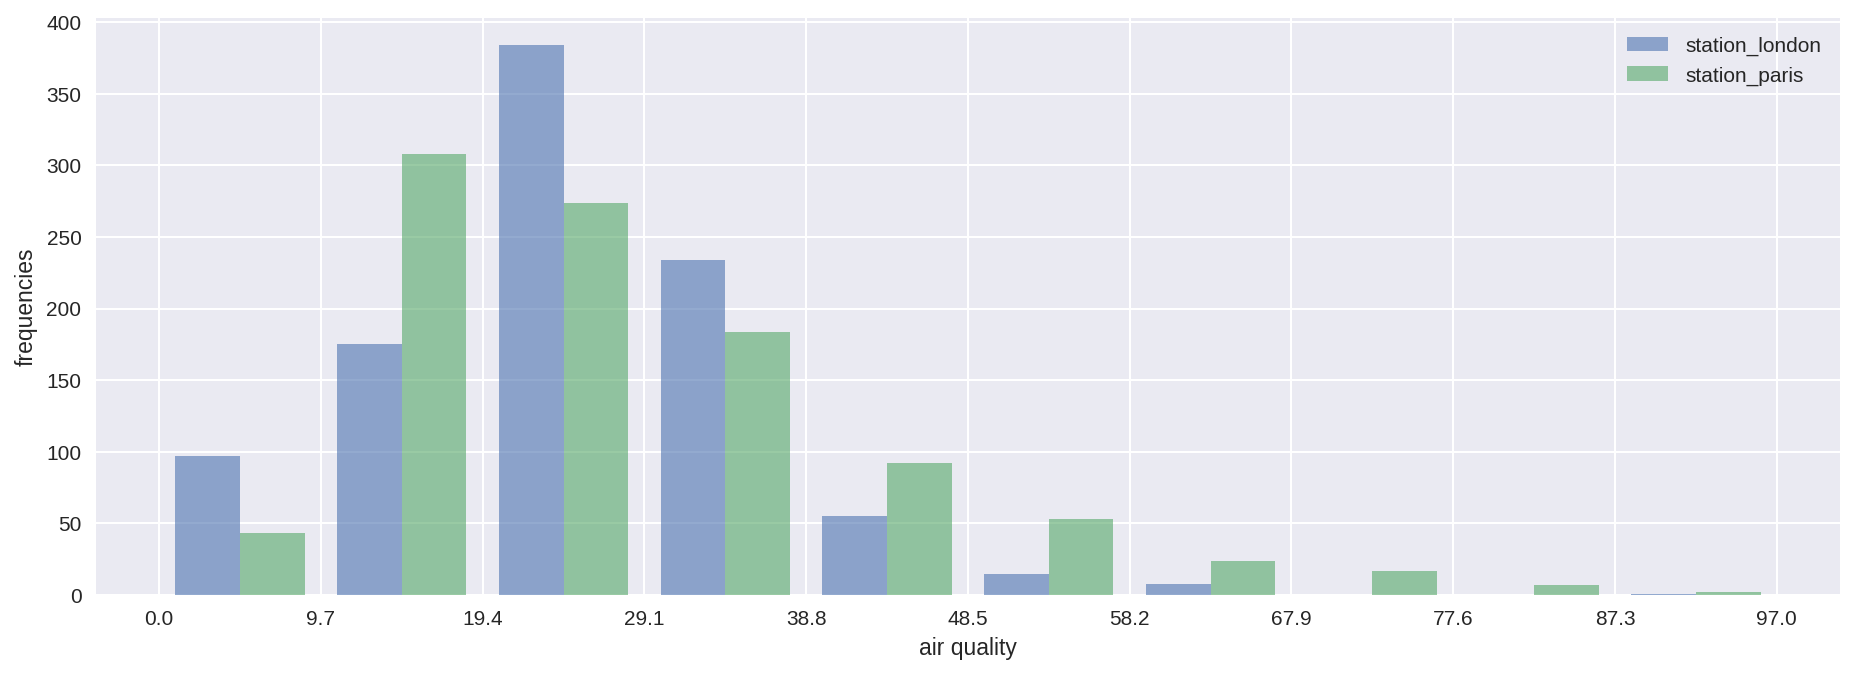

In [ ]:
# Plot two nemeric series in the same histogram

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# Plot
# Default: bins=10, histtype='bar', cumulative=False, align='mid', orientation='vertical', stacked=False
n, bins, patches = plt.hist( x=[df.iloc[:,0], df.iloc[:,1]],  # Numeric data to plot (don't pass x=df directly)
                             bins=10,           # default=10
                             label=df.columns,  # Names to appear in the legend
                             alpha=0.6,
                        )

# Plot styling
plt.xticks(bins)  # (Optional) Force the x-ticks to appear for all values in 'bins'
plt.legend()      # Add legend to the graph
plt.xlabel('air quality') # Add label to x-axis
plt.ylabel('frequencies') # Add label to y-axis

# Inspect the returned values
for key,val in {'n':n, 'bins':bins, 'patches':patches}.items():
  print( f'{key}:' )
  print( f'|-- type = {type(val)}' )
  if hasattr(val, 'shape'):
    print( f'|-- shape = {val.shape}' )
  print( f'|-- value = {val}\n' )

In [ ]:
# Style the above histogram (one style per one series)

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# Plot
# Setting a style in plt.hist() will apply the same style to both series
n, bins, patches = plt.hist( x=[df.iloc[:,0], df.iloc[:,1]],  # Numeric data to plot (don't pass x=df directly)
                             bins=10,           # default=10
                             label=df.columns,  # Names to appear in the legend
                             alpha=0.6,
                        )

# Plot styling
plt.xticks(bins)  # (Optional) Force the x-ticks to appear for all values in 'bins'
plt.legend()      # Add legend to the graph
plt.xlabel('air quality') # Add label to x-axis
plt.ylabel('frequencies') # Add label to y-axis

# Access the returned patches to set a style to each series separately
for i in range( len(patches[0]) ):  # For each bar in the first series (station_london)
  patches[0][i].set_facecolor('pink')
  patches[0][i].set_edgecolor('violet')
  patches[0][i].set_linewidth(1.5)
for i in range( len(patches[1]) ):  # For each bar in the second series (station_paris)
  patches[1][i].set_facecolor('orange')
  patches[1][i].set_edgecolor('blue')
  patches[1][i].set_linewidth(1.5)

Overlay two histograms in the same figure:

Text(0, 0.5, 'frequencies')

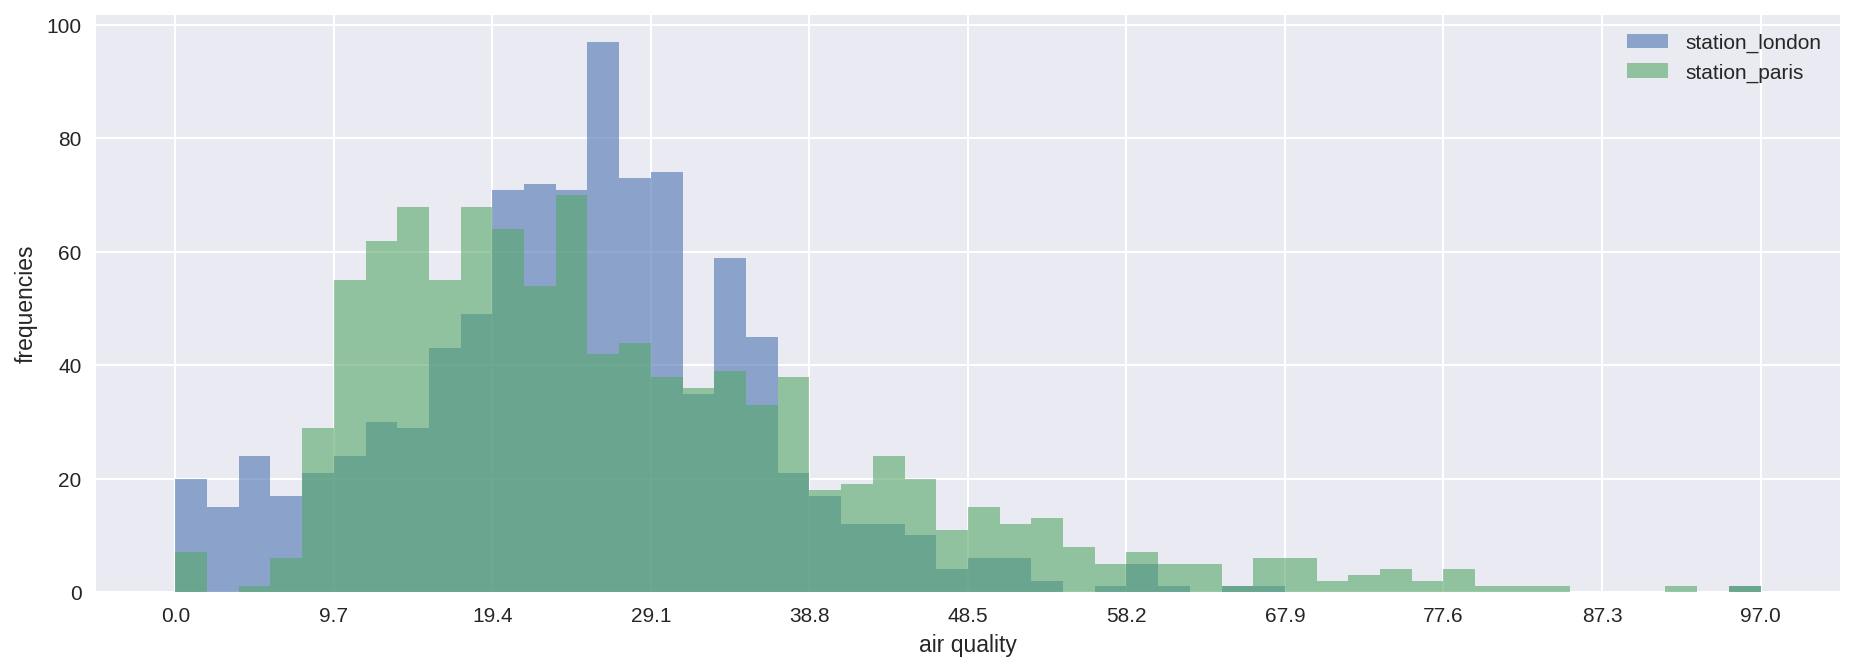

In [ ]:
# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# Plot the two histograms with two separated callings
for i,col_name in enumerate(df.columns):
  _ = plt.hist( x=df.iloc[:,i],  # Numeric data to plot
                bins=50,         # default=10
                label=col_name,  # Names to appear in the legend
                alpha=0.6,
            )

# Plot styling
plt.xticks(bins)  # (Optional) Force the x-ticks to appear for all values in 'bins'
plt.legend()      # Add legend to the graph
plt.xlabel('air quality') # Add label to x-axis
plt.ylabel('frequencies') # Add label to y-axis

### 9.1.2 Pandas's .plot()

In [ ]:
# Plotting a histogram with non-numeric values is not allowed in pandas

df_pokemon['type1'].plot(kind='hist')  # TypeError: no numeric data to plot

TypeError: no numeric data to plot

Plotting a 1D histogram of a dataframe (with two series):

Text(0.5, 0, 'air quality')

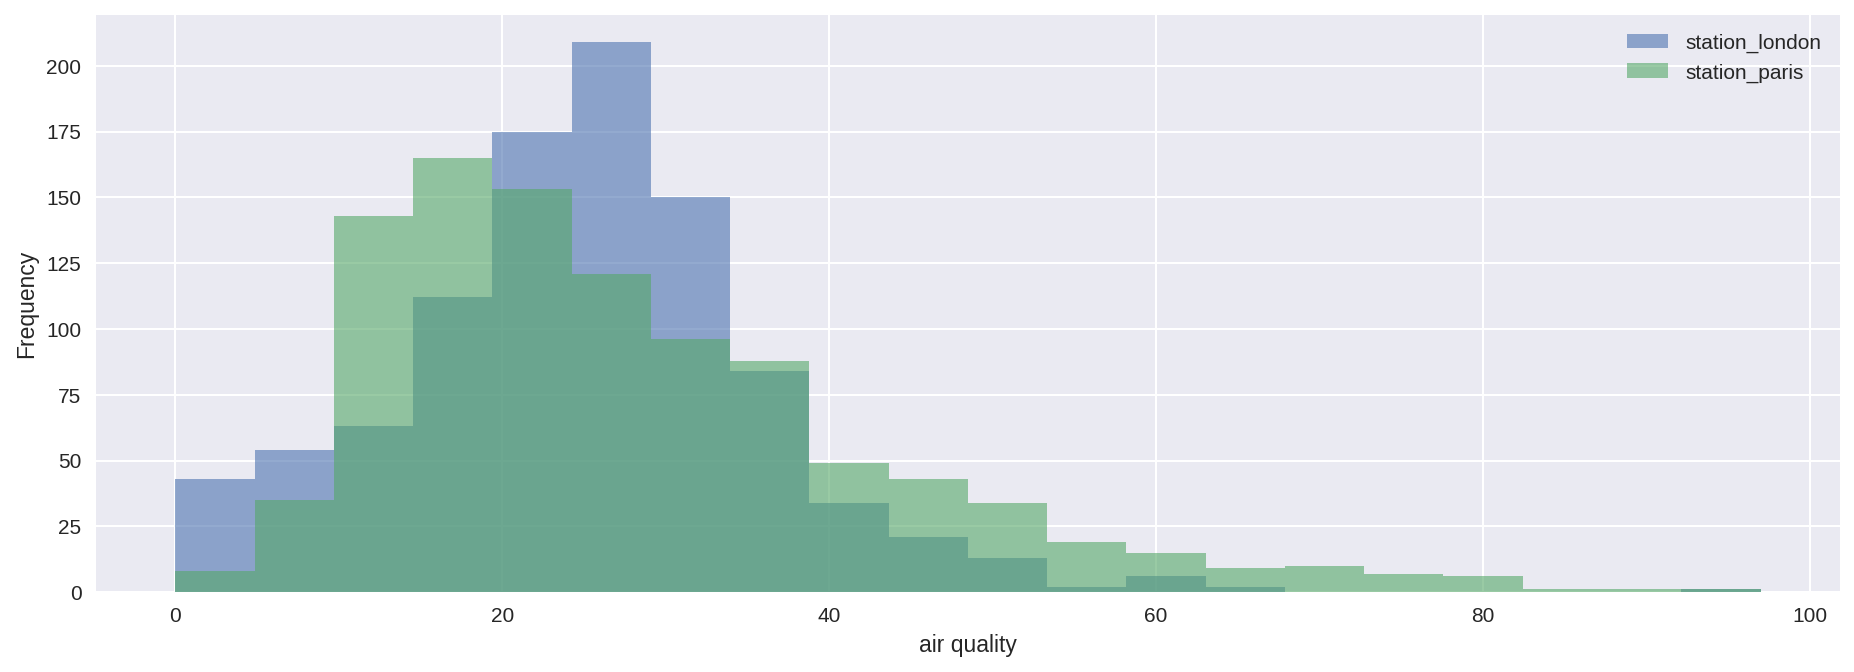

In [ ]:
# Use df.plot(kind='hist', subplots=False) to get overlapping histograms

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# Plot
df.plot( kind='hist',
         subplots=False,  # default:False
         bins=20,
         alpha=0.6,
         ax=ax
      )

# Plot styling
ax.set_xlabel('air quality')  # Add label to x-axis

In [ ]:
# Use df.plot(kind='hist', subplots=True) to separate histograms into subplots

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# Plot
axes = df.plot( kind='hist',
                subplots=True,   # default:False
                bins=20,
                alpha=0.6,
          )

In [ ]:
# Styling the above figure with two subplots
# More details about subplot in Matplotlib3.ipynb

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# (Optional) Figure setting
fig, ax = plt.subplots(dpi=150)

# Plot
axes = df.plot( kind='hist',
                subplots=True,   # default:False
                bins=20,
                alpha=0.6,
                sharey=True,     # default:False
                ax=ax
          )

# Add label to x-axis
for i in range( len(axes) ):
  axes[i].set_xlabel('air quality')

# Adjust the padding between and around subplots
fig.tight_layout()

<ipython-input-79-77fb77da94af>:11: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



## 9.2 2D Histogram (square binning)

- Plotting a 2D histogram with square binning is supported by matplotlib's pyplot but not by pandas's `.plot()`.
- For a 2D histogram with hexagonal binning, check the next section of "Hexbin plot."

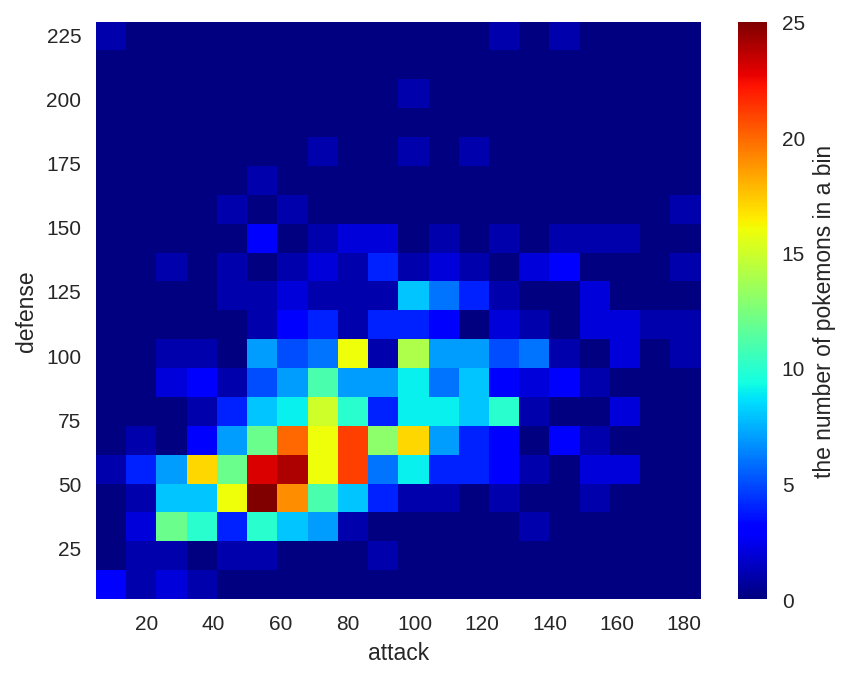

In [ ]:
# (Optional) Figure setting
plt.figure(figsize=(6.5,5),dpi=150)

# Plot
h, x_bin, y_bin, _ = plt.hist2d(x=df_pokemon['attack'], y=df_pokemon['defense'],
                                bins=20, cmap='jet')
plt.xlabel('attack')  # Add label to x-axis
plt.ylabel('defense') # Add label to y-axis

# Add colorbar to the plot
cb = plt.colorbar()
cb.set_label('the number of pokemons in a bin')

In [ ]:
# Inspect the returned histogram which is a 2D array
# - Values in x are histogrammed along the first dimension
# - Values in y are histogrammed along the second dimension

print(f"type: {type(h)}")
if hasattr(h,'shape'):
  print(f"shape: {h.shape}")
print(f"value:\n{h}")

type: <class 'numpy.ndarray'>
shape: (20, 20)
value:
[[ 3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 1.  1.  2.  1.  4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 2.  1. 12.  8.  7.  0.  0.  2.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1.  0. 10.  8. 17.  3.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1.  4. 16. 12.  7.  4.  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1. 10. 25. 23. 12.  8.  5.  7.  1.  1.  0.  3.  0.  1.  0.  0.  0.
   0.  0.]
 [ 0.  0.  8. 19. 24. 20.  9.  7.  5.  3.  2.  1.  0.  1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  7. 11. 16. 16. 15. 11.  6.  4.  1.  2.  1.  0.  0.  1.  0.  0.
   0.  0.]
 [ 0.  0.  1.  8. 21. 21. 10.  7. 16.  1.  1.  1.  2.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1.  0.  4.  6. 13.  4.  7.  1.  4.  1.  4.  2.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1.  9. 17.  9.  9. 14.  4.  8.  1.  0.  0.  0.  1.  0.  1.
   0.  0.]
 [ 0.  0.  0

# 10. Hexbin plot

**Overview:**
- <u>When a scatter plot is too dense to interpret</u>, hexbin helps to bin the area of the chart and assigns color intensity accordingly.
- Hexbin can be thought as <u>a 2D histogram with hexagonal binning</u>.
- Hexbin is very useful when two conditions are met:
  1. The data contains hundreds (or thousands, or more) of X-Y data points.
  2. The X-Y variables are spatial in nature (e.g., latitude-longitude pairs).

**When to use hexbin:** (https://think.design/services/data-visualization-data-design/hexbin/)
1. When you need to create an unbiased density distribution
  - Hexbin is popular for representing spatial data covering geographies. With a hexbin, each region in choropleth maps can be represented equally dismissing the bias.
2. When you need to represent discrete categorical information
  - Hexbins are similar in nature to heatmaps.
  - One additional thing that can be done with hexbin which can’t easily do with the heatmap is to use categorical information. Hexbin can visualize categorical information rather than quantitative information.
3. Show complete information eliminating the edge effects
  - The idea with hexagons is to reduce sampling bias from edge effects of the grid shape, which is related to high perimeter:area ratios.
    - A circle is the lowest ratio, but cannot form a continuous grid.
    - Hexagons are the closest shape to a circle that can still form a grid.
    - If working over a larger area, a square grid will suffer more from distortion due to curvature than shapes like hexagons.
  - Hexagonal grids and hexbins are preferable <u>when issues of connectivity, nearest neighborhood or movement paths are crucial aspects</u> to be considered in the analysis.

## 10.1 Matplotlib's pyplot

- Codes in the below cell show an easy example of using hexbin as a mere 2D histogram where the value in each bin is the element count.

- For hexbin, it is possible to assign specific values to each bin and/or apply a function to reduce multiple values falling into the same bin. For this, please refer to `C` and `reduce_C_function` parameters in https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html.

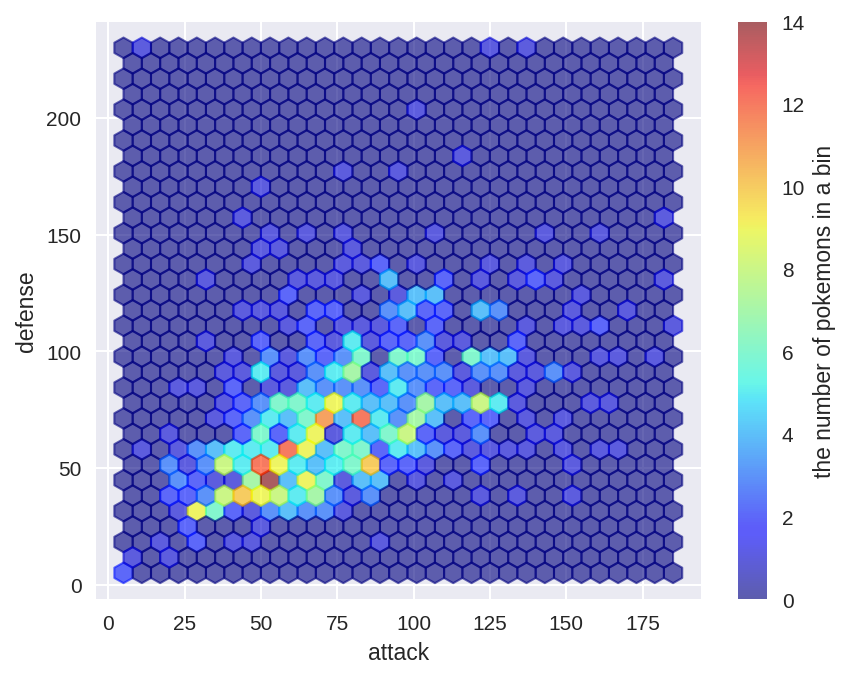

In [ ]:
# (Optional) Figure setting
plt.figure(figsize=(6.5,5),dpi=150)

# Plot
poly_collection = plt.hexbin(x=df_pokemon['attack'], y=df_pokemon['defense'], # The data positions
                             gridsize=30,  # default:100
                             bins=None,    # How to discretize the hexagon values
                                           # - default=None: no binning is applied; the color of each hexagon directly corresponds to its count value
                             cmap='jet',
                             alpha=0.6)
plt.xlabel('attack')  # Add label to x-axis
plt.ylabel('defense') # Add label to y-axis

# Add colorbar to the plot
cb = plt.colorbar()
cb.set_label('the number of pokemons in a bin')

## 10.2 Pandas's .plot()

Text(0, 0.5, 'the number of pokemons in a bin')

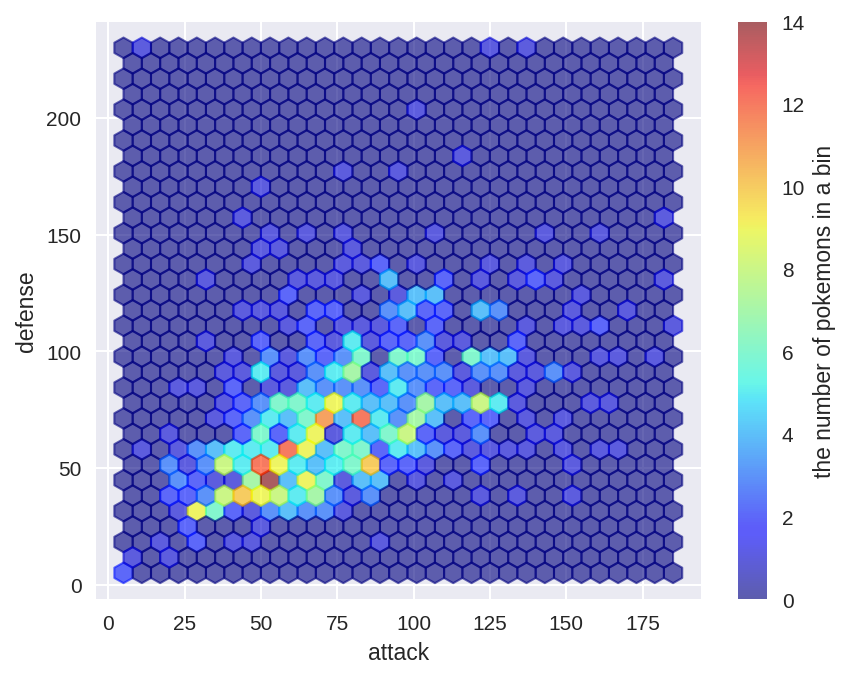

In [ ]:
# (Optional) Figure setting
plt.figure(figsize=(6.5,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Plot
hb = df_pokemon.plot(kind='hexbin',
                     x='attack',     # The column label or position for x points
                     y='defense',    # The column label or position for y points
                     gridsize=30,    # default:100
                     cmap='jet',
                     alpha=0.6,
                     ax=ax
                  )

# (Optional) Set a label to the colorbar
# Pandas does not return the axis for the colorbar, so we must retrieve it ourselves by matplotlib
fig = plt.gcf()             # Get the current figure
cb_ax = fig.get_axes()[1]   # There are two axes in this figure for the plot and the colorbar respectively
cb_ax.set_ylabel('the number of pokemons in a bin')

# 11. Kernel Density Estimation (KDE)

> Below explanation from https://www.itm-conferences.org/articles/itmconf/pdf/2018/08/itmconf_sam2018_00037.pdf

**Problems of a histogram:**
- Histogram is a <u>highly subjective structure</u> as its shape depends on the subjective choice of the number (or widths) of class intervals (bins) to which the range of a sample is divided, and on the choice of the initial point.
- Independently of the class selection method used, the histogram suffers from its original sin: <u>data binning, which depraves the data of their individual location</u> replacing their locations with a bin (interval) location. <u>This causes the histogram shape to become discontinuous, and flat in each bin</u>.

**KDE as an alternation:**
- In most practical applications, KDE produces a smooth empirical probability density function (pdf) based on individual locations of all sample data. Such pdf estimate seems to better represent the "true" pdf of a continuous variable.

<div align=center><img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Comparison_of_1D_histogram_and_KDE.png" alt="Histogram vs. KDE" width=500></div>

## 11.1 Matplotlib's pyplot

There is no direct function/method to instantly create a KDE plot in matplotlib. But a KDE plot can be simply created by using pandas's .plot() or seaborn.

## 11.2 Pandas's .plot()

Learn more about how a KDE plot is computed and the effect of KDE's bandwidth selection in https://aakinshin.net/posts/kde-bw/

Text(0.5, 0, 'air quality')

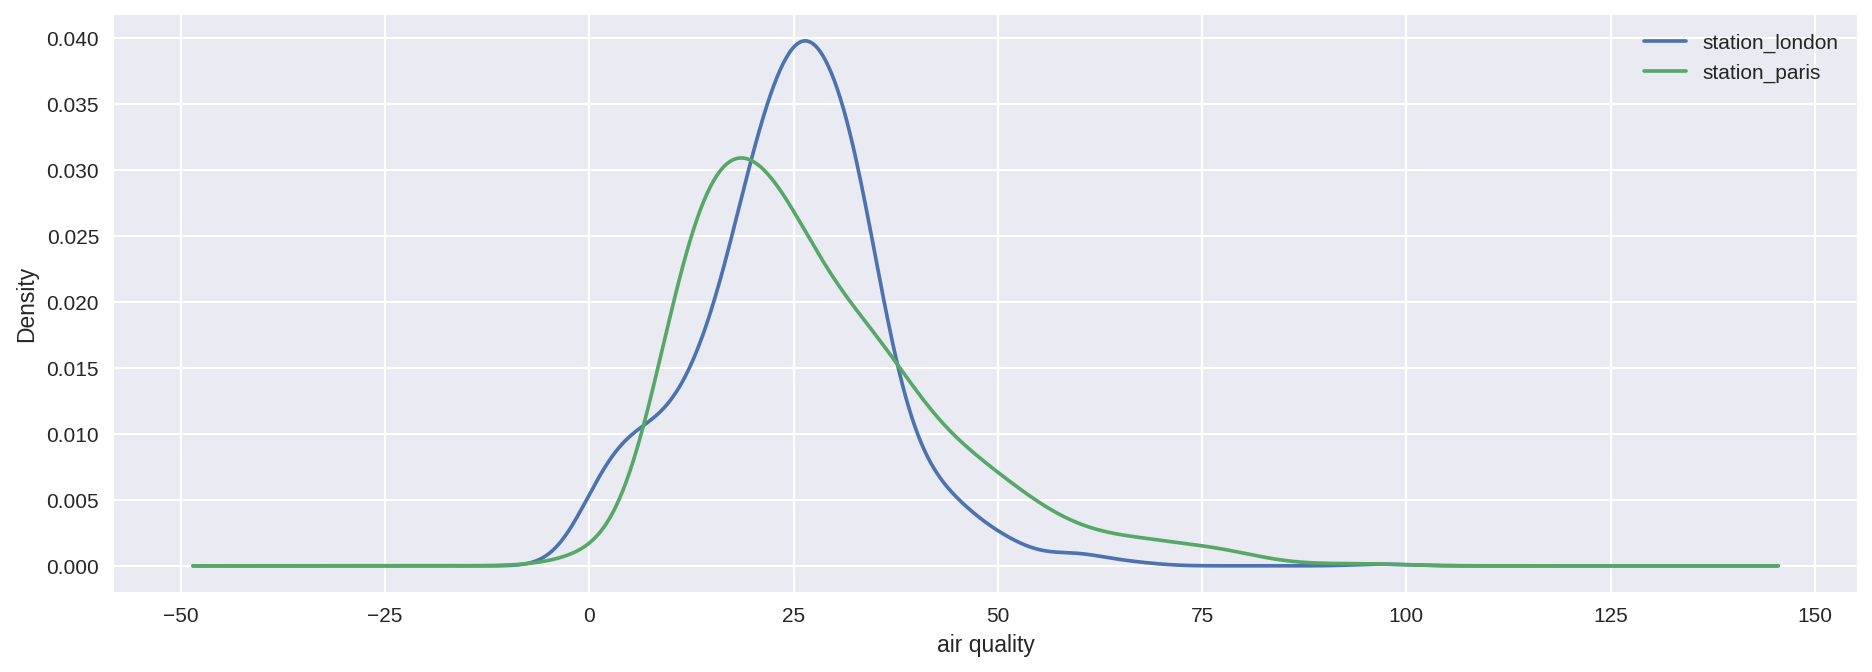

In [ ]:
# Use df.plot(kind='kde', subplots=False) to get overlapping KDE curves
# Manually try using different values of scalar bandwidths to see the smoothness effects

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# Plot
df.plot( kind='kde',
         bw_method=0.3,  # A non-zero scalar bandwidth that defines the smoothness of curve
                         # - Too-small bandwidth may result in overfitting (undersmoothing)
                         # - Too-large bandwidth may result in underfitting (oversmoothing)
         ax=ax
      )

# Plot styling
ax.set_xlabel('air quality')  # Add label to x-axis

In [ ]:
# Same as above but use an algorithm for the bandwidth selector/estimator to choose the optimal bandwidth

# (Optional) Figure setting
plt.figure(figsize=(15,5),dpi=150)

# Store the current axes in a separated variable
ax = plt.gca()

# Prepare the dataframe of numeric columns
df = df_air[['station_london', 'station_paris']]

# Plot
df.plot( kind='kde',
         bw_method=None,  # Possible values = {'scott','silverman'}
                          # default=None means using 'scott' to calculate the estimator bandwidth
         ax=ax
      )

# Plot styling
ax.set_xlabel('air quality')  # Add label to x-axis

Text(0.5, 0, 'air quality')